# Análisis predictivo de precios inmobiliarios





In [2]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## 1. Carga de datos

In [4]:
# Se cargan los datos
df = pd.read_excel("/content/Base Unificada.xlsx")
df

,Calle,zona,Precio,Habitaciones,m2,Precio/m2,Tipo,Ascensor,Orientacion,Planta
0,"Almacén en argumosa, 12, Lavapiés-Embajadores",Lavapiés-Embajadores,280000,0,325,861.538462,locales,0,0,0
1,"puerta del Sol, 1, Sol",Sol,90000,0,100,900.000000,oficinas,0,0,0
2,"puerta del Sol, 1, Sol",Sol,90000,0,100,900.000000,oficinas,0,0,0
3,Local o nave en Sol,Sol,273000,0,290,941.379310,locales,0,0,0
4,Local o nave en Sol,Sol,273000,0,290,941.379310,locales,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20452,"Local en rentabilidad en calle de las Huertas,...",Huertas-Cortes,6000000,0,26,230769.230769,locales,0,0,0
20453,"calle de Cedaceros, Huertas-Cortes",Huertas-Cortes,7000000,0,15,466666.666667,oficinas,0,0,0
20454,Local en rentabilidad en calle de la ribera de...,Lavapiés-Embajadores,3000000,0,13,230769.230769,locales,0,0,0
20455,"Local en calle del Mesón de Paredes, Lavapiés-...",Lavapiés-Embajadores,2500000,0,13,192307.692308,locales,0,0,0


## 2. Exploración de datos (EDA)

### 2.1. Evaluación inicial

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20457 entries, 0 to 20456
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Calle         20457 non-null  object 
 1   zona          20457 non-null  object 
 2   Precio        20457 non-null  int64  
 3   Habitaciones  20457 non-null  int64  
 4   m2            20457 non-null  int64  
 5   Precio/m2     20457 non-null  float64
 6   Tipo          20457 non-null  object 
 7   Ascensor      20457 non-null  int64  
 8   Orientacion   20457 non-null  int64  
 9   Planta        20457 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.6+ MB


In [6]:
# Se describen las variables numericas
df.describe()

,Precio,Habitaciones,m2,Precio/m2,Ascensor,Orientacion,Planta
count,2.045700e+04,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000,20457.000000
mean,8.292570e+05,2.223933,109.928289,7485.437982,0.665640,0.716674,2.236007
std,7.484866e+05,1.425012,78.290963,5563.383181,0.471778,0.450624,1.837058
min,4.200000e+04,0.000000,11.000000,861.538462,0.000000,0.000000,-1.000000
25%,3.500000e+05,1.000000,57.000000,5633.333333,0.000000,0.000000,1.000000
50%,6.600000e+05,2.000000,96.000000,7160.000000,1.000000,1.000000,2.000000
75%,9.890000e+05,3.000000,137.000000,8500.000000,1.000000,1.000000,3.000000
max,1.800000e+07,9.000000,900.000000,466666.666667,1.000000,1.000000,10.000000


In [7]:
# Se describen las variables categoricas
df.describe(include="object")

,Calle,zona,Tipo
count,20457,20457,20457
unique,1127,6,3
top,Piso en Chueca-Justicia,Malasaña-Universidad,Vivienda
freq,964,4922,19993


In [8]:
# Se revisan el número de duplicados
df.duplicated().sum()

np.int64(18119)

In [9]:
# Se indentifica que es lo que contienen las variables categoricas
for columna in ["zona", "Tipo"]:
    print(f"Valores unicos de la columna '{columna}'")
    print(df[columna].unique().tolist())
    print()


Valores unicos de la columna 'zona'
['Lavapiés-Embajadores', 'Sol', 'Malasaña-Universidad', 'Palacio', 'Chueca-Justicia', 'Huertas-Cortes']

Valores unicos de la columna 'Tipo'
['locales', 'oficinas', 'Vivienda']



### 2.2. Limpieza de datos

In [10]:
# Se eliminan las variables duplicadas
df = df.drop_duplicates()
df

,Calle,zona,Precio,Habitaciones,m2,Precio/m2,Tipo,Ascensor,Orientacion,Planta
0,"Almacén en argumosa, 12, Lavapiés-Embajadores",Lavapiés-Embajadores,280000,0,325,861.538462,locales,0,0,0
1,"puerta del Sol, 1, Sol",Sol,90000,0,100,900.000000,oficinas,0,0,0
3,Local o nave en Sol,Sol,273000,0,290,941.379310,locales,0,0,0
5,"Local en calle del Amparo, Lavapiés-Embajadores",Lavapiés-Embajadores,649000,0,680,954.411765,locales,0,0,0
6,"Local en calle Provisiones, Lavapiés-Embajadores",Lavapiés-Embajadores,589900,0,614,960.749186,locales,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20452,"Local en rentabilidad en calle de las Huertas,...",Huertas-Cortes,6000000,0,26,230769.230769,locales,0,0,0
20453,"calle de Cedaceros, Huertas-Cortes",Huertas-Cortes,7000000,0,15,466666.666667,oficinas,0,0,0
20454,Local en rentabilidad en calle de la ribera de...,Lavapiés-Embajadores,3000000,0,13,230769.230769,locales,0,0,0
20455,"Local en calle del Mesón de Paredes, Lavapiés-...",Lavapiés-Embajadores,2500000,0,13,192307.692308,locales,0,0,0


In [11]:
# Calculo de ouliers
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular IQR y detectar outliers con porcentaje
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_values = df.loc[mask_outliers, col]
    outliers[col] = outlier_values

    # Calcular porcentaje
    porcentaje = (len(outlier_values) / len(df)) * 100

    # Mostrar resultados
    print(f"\nOutliers en '{col}': {len(outlier_values)} valores ({porcentaje:.2f}%)")


Outliers en 'Precio': 180 valores (7.70%)

Outliers en 'Habitaciones': 35 valores (1.50%)

Outliers en 'm2': 108 valores (4.62%)

Outliers en 'Precio/m2': 94 valores (4.02%)

Outliers en 'Ascensor': 0 valores (0.00%)

Outliers en 'Orientacion': 0 valores (0.00%)

Outliers en 'Planta': 21 valores (0.90%)


### 2.3. Graficas

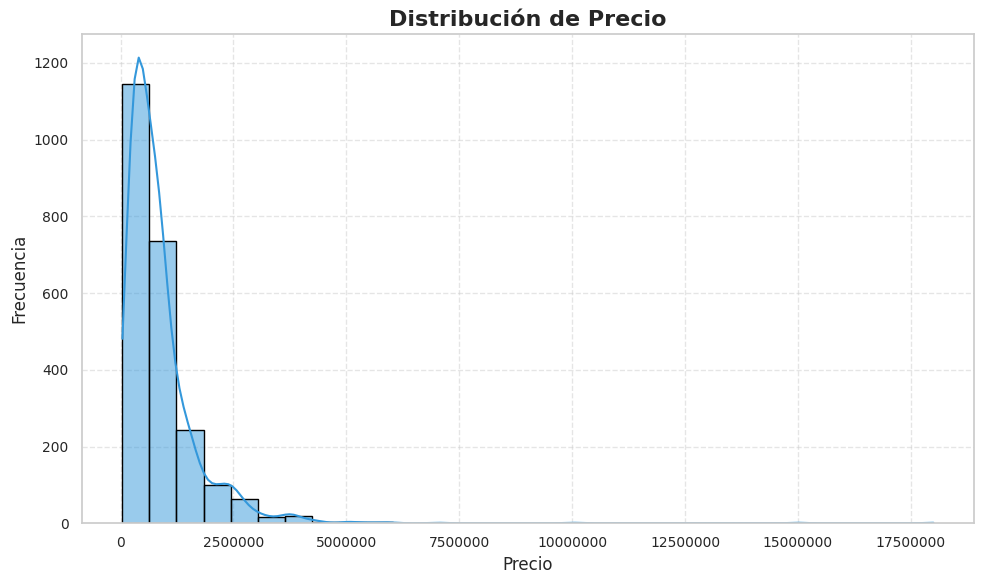

In [12]:
sns.set(style="whitegrid")  # Estilo moderno

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Precio", bins=30, kde=True, color="#3498db", edgecolor='black')

plt.title("Distribución de Precio", fontsize=16, fontweight='bold')
plt.xlabel("Precio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.ticklabel_format(axis='x', style='plain')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

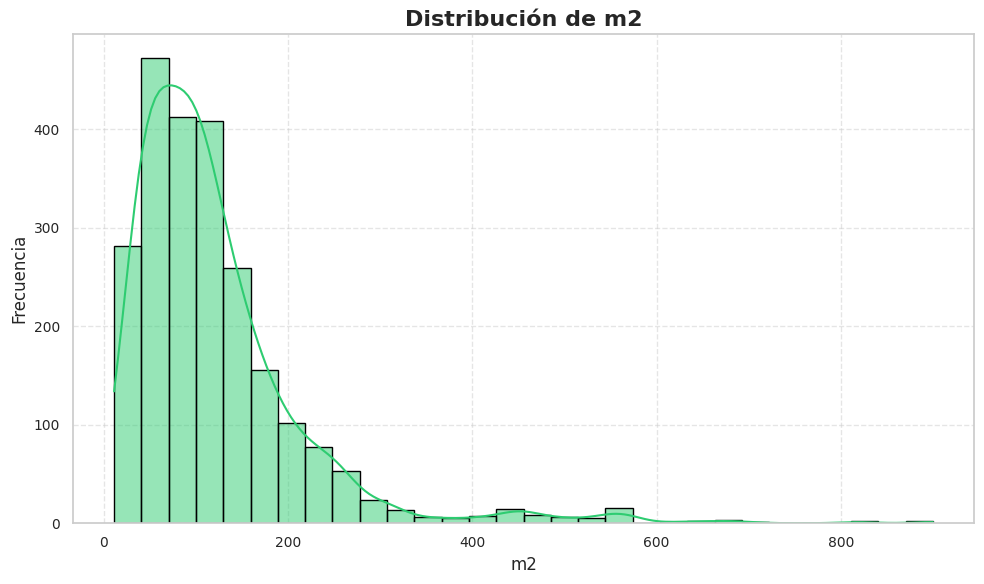

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="m2", bins=30, kde=True, color="#2ecc71", edgecolor='black')

plt.title("Distribución de m2", fontsize=16, fontweight='bold')
plt.xlabel("m2", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.ticklabel_format(axis='x', style='plain')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

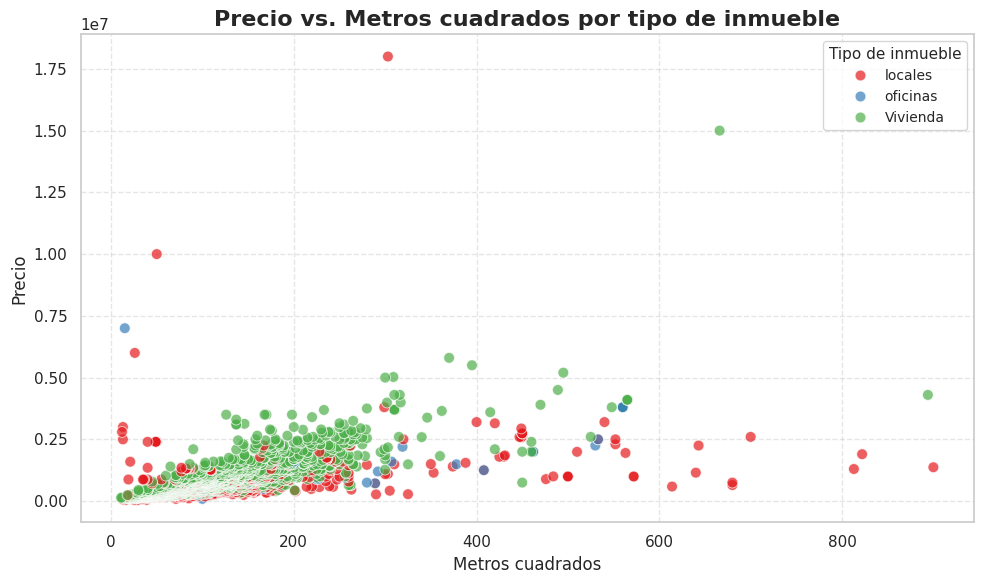

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='m2', y='Precio', hue='Tipo', palette='Set1', alpha=0.7, s=60)

plt.title("Precio vs. Metros cuadrados por tipo de inmueble", fontsize=16, fontweight='bold')
plt.xlabel("Metros cuadrados", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.legend(title="Tipo de inmueble", fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

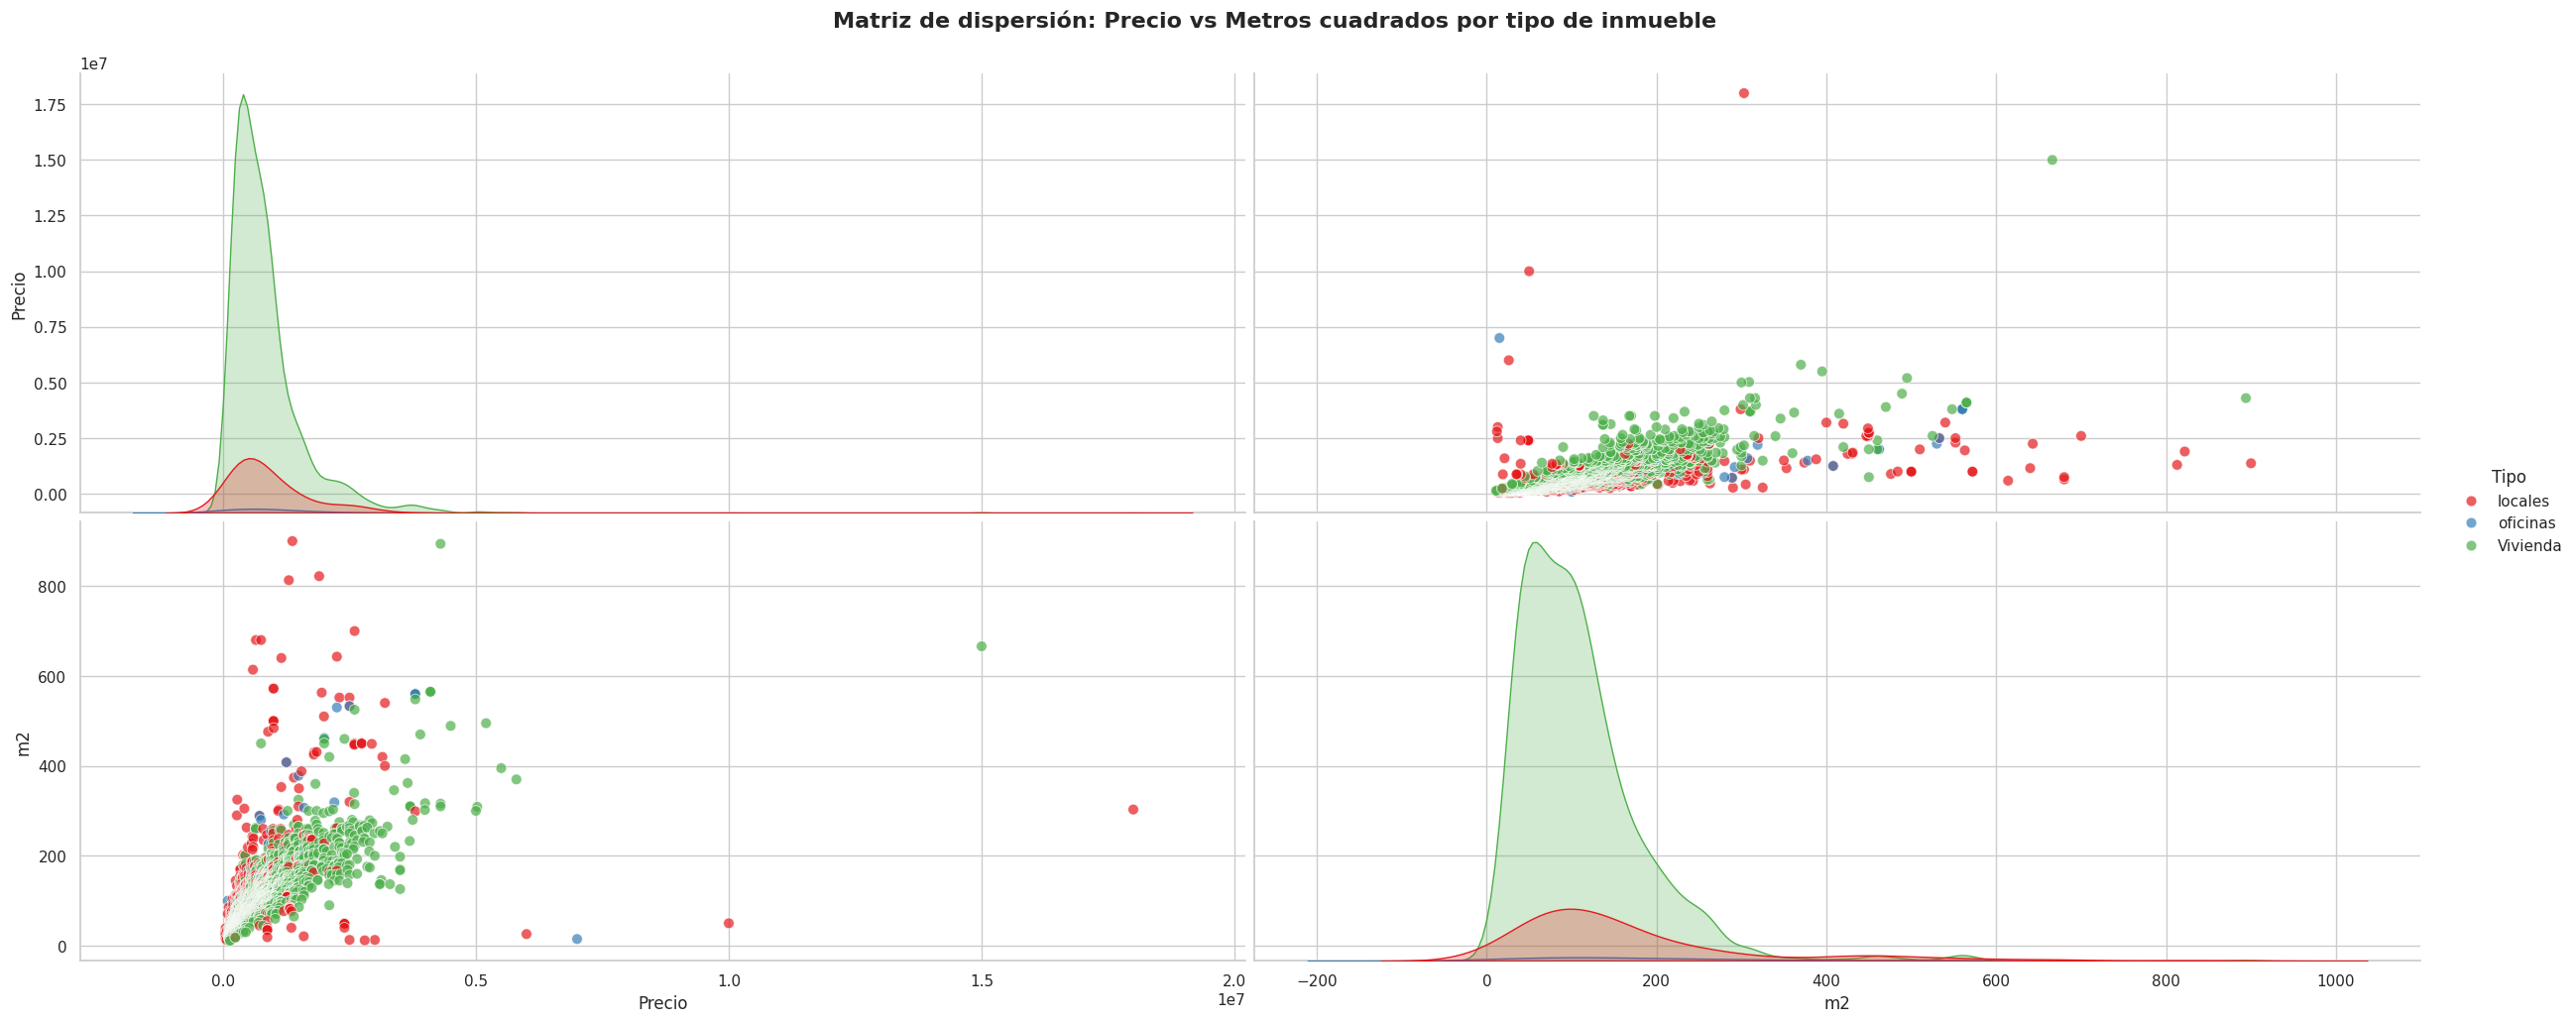

In [15]:
sns.set(style="whitegrid")

# Ajustar tamaño: height controla la altura, aspect controla el ancho relativo
g = sns.pairplot(
    df[["Precio", "m2", "Tipo"]],
    hue='Tipo',
    palette='Set1',
    height=5,       # Altura de cada subgráfico
    aspect=2.5,     # Relación ancho/alto (más alto = más ancho)
    plot_kws={'alpha': 0.7, 's': 60}
)

g.fig.suptitle("Matriz de dispersión: Precio vs Metros cuadrados por tipo de inmueble",
               fontsize=16, fontweight='bold', y=1.03)

plt.show()

              Precio  Habitaciones   m2  Precio/m2  Ascensor  Orientacion  \
Precio           1.0           0.3  0.6        0.4       0.2          0.2   
Habitaciones     0.3           1.0  0.2       -0.0       0.4          0.5   
m2               0.6           0.2  1.0       -0.1       0.0          0.1   
Precio/m2        0.4          -0.0 -0.1        1.0      -0.0         -0.0   
Ascensor         0.2           0.4  0.0       -0.0       1.0          0.4   
Orientacion      0.2           0.5  0.1       -0.0       0.4          1.0   
Planta           0.0           0.3 -0.1       -0.0       0.3          0.4   

              Planta  
Precio           0.0  
Habitaciones     0.3  
m2              -0.1  
Precio/m2       -0.0  
Ascensor         0.3  
Orientacion      0.4  
Planta           1.0  


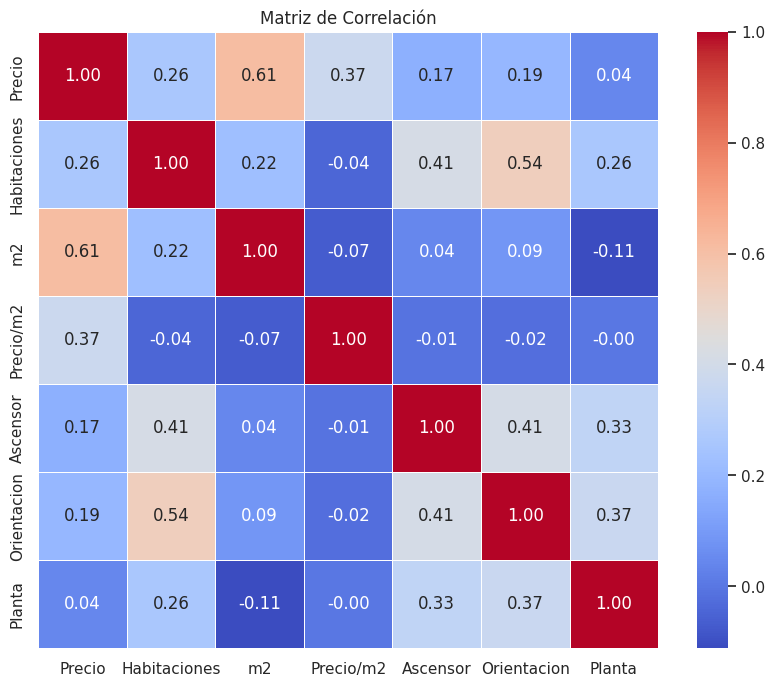

In [16]:
corr = df.select_dtypes(include=["int64", "float64"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
print(corr.round(1))
plt.show()

Frecuencias para la variable: zona
zona
Malasaña-Universidad    581
Lavapiés-Embajadores    483
Palacio                 372
Chueca-Justicia         341
Sol                     322
Huertas-Cortes          239
Name: count, dtype: int64 



<ipython-input-19-f0a1178b7ea6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencias.index, y=frecuencias.values, palette="Set2")


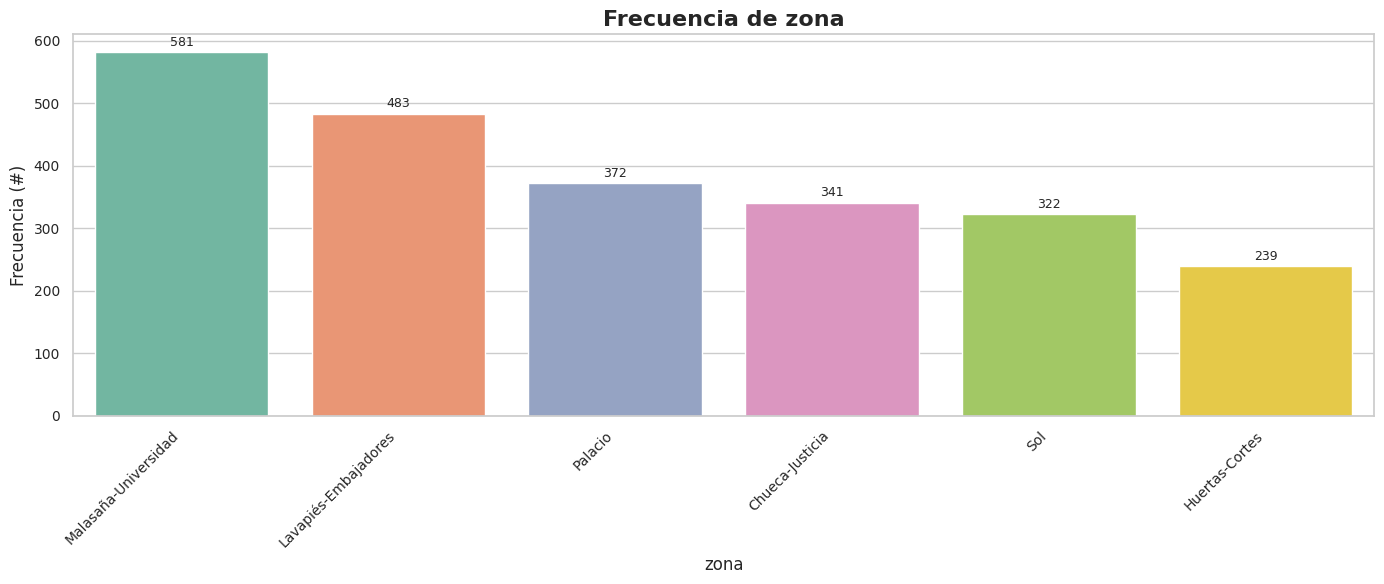

In [19]:
sns.set(style="whitegrid")

# Gráfico separado para "zona"
columna = "zona"
frecuencias = df[columna].value_counts().sort_values(ascending=False)

print(f"Frecuencias para la variable: {columna}")
print(frecuencias, "\n")

plt.figure(figsize=(14, 6))
frecuencias.index = [x.replace(" ", "\n") for x in frecuencias.index]

ax = sns.barplot(x=frecuencias.index, y=frecuencias.values, palette="Set2")
plt.title(f"Frecuencia de {columna}", fontsize=16, fontweight='bold')
plt.xlabel(columna, fontsize=12)
plt.ylabel("Frecuencia (#)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for i, val in enumerate(frecuencias.values):
    ax.text(i, val + max(frecuencias.values)*0.01, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Frecuencias para la variable: Tipo
       Tipo  Frecuencia
0  Vivienda        1933
1   locales         365
2  oficinas          40 



<ipython-input-20-f184377f1878>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")


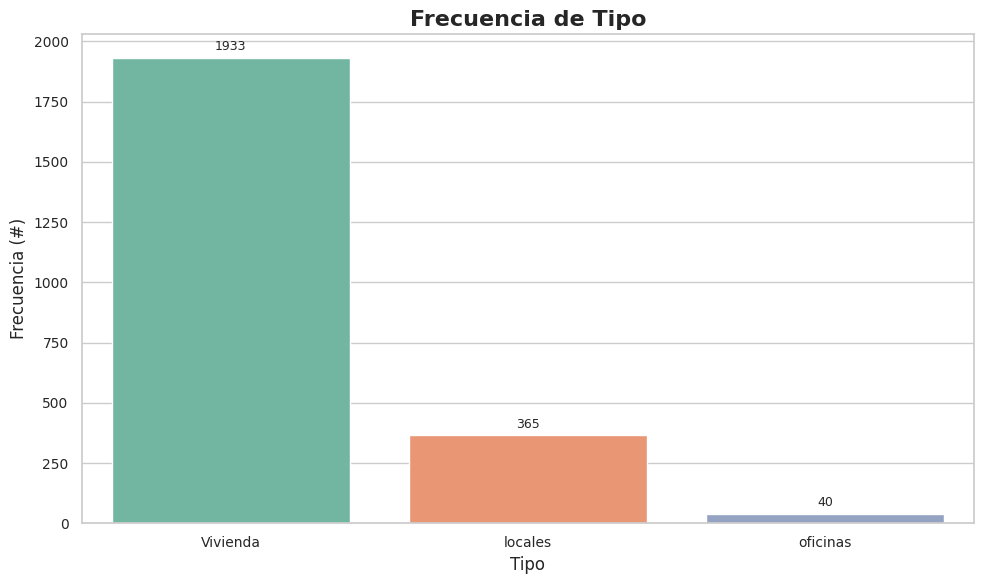

In [20]:
columna = "Tipo"
frecuencias = df[columna].value_counts().sort_values(ascending=False).reset_index()
frecuencias.columns = [columna, "Frecuencia"]

print(f"Frecuencias para la variable: {columna}")
print(frecuencias, "\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")
plt.title(f"Frecuencia de {columna}", fontsize=16, fontweight='bold')
plt.xlabel(columna, fontsize=12)
plt.ylabel("Frecuencia (#)", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

for i, val in enumerate(frecuencias["Frecuencia"]):
    ax.text(i, val + max(frecuencias["Frecuencia"])*0.01, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Frecuencias para la variable: Habitaciones
  Habitaciones  Frecuencia
0            0         527
1            1         466
2            2         617
3            3         434
4            4         180
5            5          57
6            6          22
7            7          21
8            8           8
9            9           6 



<ipython-input-22-f0a324250772>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")


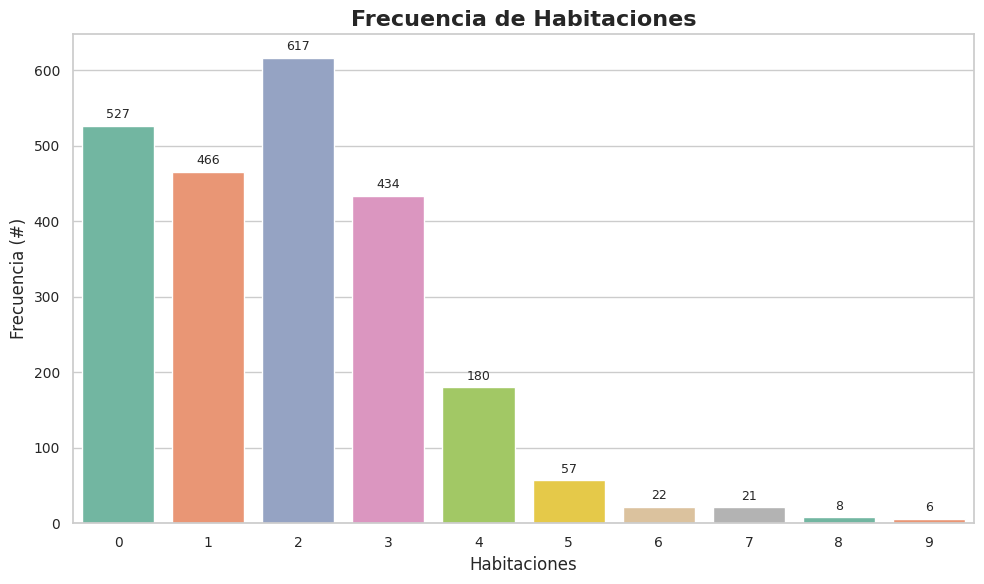

In [22]:
columna = "Habitaciones"
frecuencias = df[columna].value_counts().sort_index()
frecuencias.index = frecuencias.index.astype(str)
frecuencias = frecuencias.reset_index()
frecuencias.columns = [columna, "Frecuencia"]

print(f"Frecuencias para la variable: {columna}")
print(frecuencias, "\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")

plt.title(f"Frecuencia de {columna}", fontsize=16, fontweight='bold')
plt.xlabel(columna, fontsize=12)
plt.ylabel("Frecuencia (#)", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

for i, val in enumerate(frecuencias["Frecuencia"]):
    ax.text(i, val + max(frecuencias["Frecuencia"])*0.01, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Frecuencias para la variable: Ascensor
  Ascensor  Frecuencia
0        0        1005
1        1        1333 



<ipython-input-23-952631edd0f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")


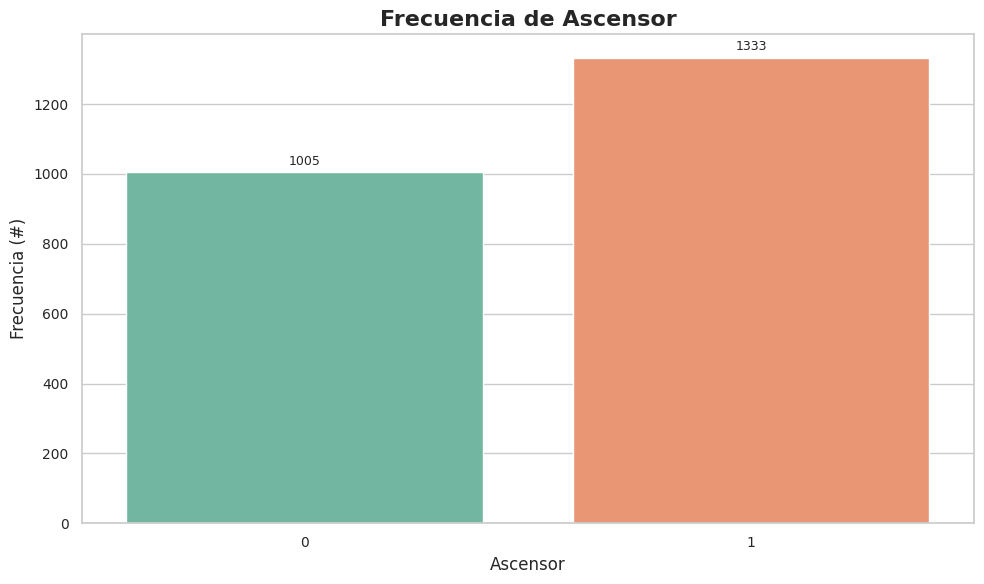

In [23]:
columna = "Ascensor"
frecuencias = df[columna].value_counts().sort_index()
frecuencias.index = frecuencias.index.astype(str)
frecuencias = frecuencias.reset_index()
frecuencias.columns = [columna, "Frecuencia"]

print(f"Frecuencias para la variable: {columna}")
print(frecuencias, "\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")

plt.title(f"Frecuencia de {columna}", fontsize=16, fontweight='bold')
plt.xlabel(columna, fontsize=12)
plt.ylabel("Frecuencia (#)", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Etiquetas encima de cada barra
for i, val in enumerate(frecuencias["Frecuencia"]):
    ax.text(i, val + max(frecuencias["Frecuencia"])*0.01, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Frecuencias para la variable: Orientacion
  Orientacion  Frecuencia
0           0         920
1           1        1418 



<ipython-input-24-0fd766ea112b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")


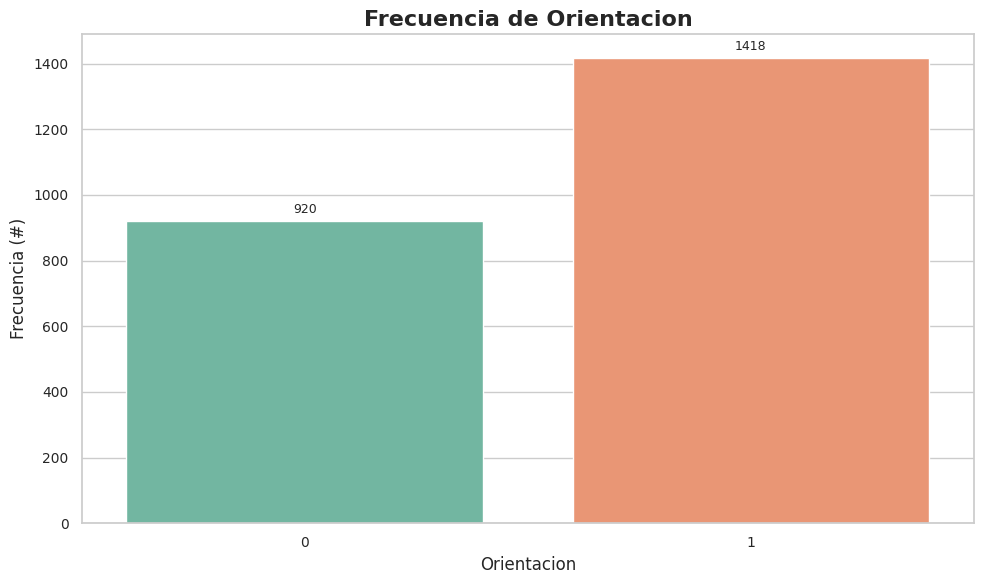

In [24]:
columna = "Orientacion"
frecuencias = df[columna].value_counts().sort_index()
frecuencias.index = frecuencias.index.astype(str)
frecuencias = frecuencias.reset_index()
frecuencias.columns = [columna, "Frecuencia"]

print(f"Frecuencias para la variable: {columna}")
print(frecuencias, "\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")

plt.title(f"Frecuencia de {columna}", fontsize=16, fontweight='bold')
plt.xlabel(columna, fontsize=12)
plt.ylabel("Frecuencia (#)", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Añadir etiquetas encima de cada barra
for i, val in enumerate(frecuencias["Frecuencia"]):
    ax.text(i, val + max(frecuencias["Frecuencia"])*0.01, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Frecuencias para la variable: Planta
   Planta  Frecuencia
0      -1          29
1       0         706
2       1         447
3       2         342
4       3         325
5       4         263
6       5         157
7       6          43
8       7           5
9       8          15
10      9           2
11     10           4 



<ipython-input-26-842542d0967e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")


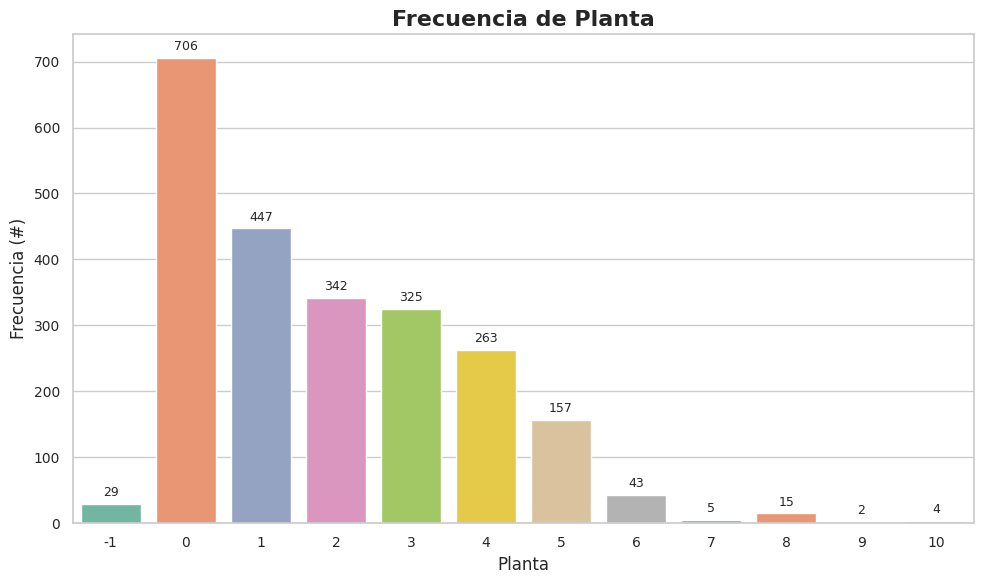

In [26]:
columna = "Planta"
frecuencias = df[columna].value_counts().sort_index()
frecuencias.index = frecuencias.index.astype(str)
frecuencias = frecuencias.reset_index()
frecuencias.columns = [columna, "Frecuencia"]

print(f"Frecuencias para la variable: {columna}")
print(frecuencias, "\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frecuencias, x=columna, y="Frecuencia", palette="Set2")

plt.title(f"Frecuencia de {columna}", fontsize=16, fontweight='bold')
plt.xlabel(columna, fontsize=12)
plt.ylabel("Frecuencia (#)", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Etiquetas encima de cada barra
for i, val in enumerate(frecuencias["Frecuencia"]):
    ax.text(i, val + max(frecuencias["Frecuencia"])*0.01, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


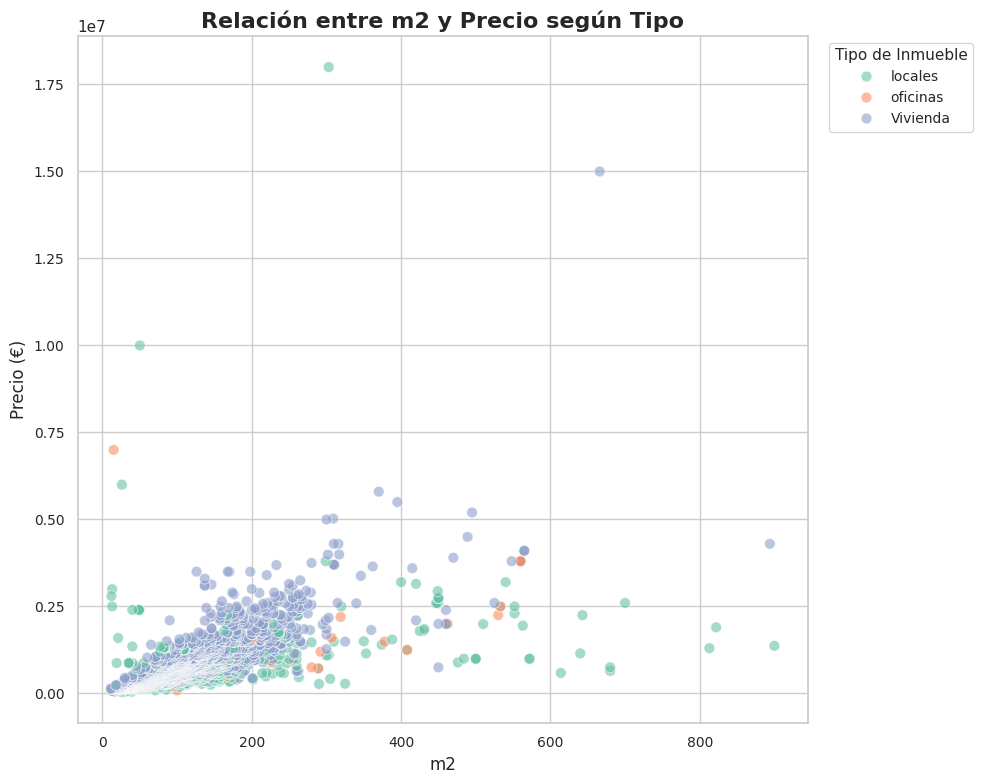

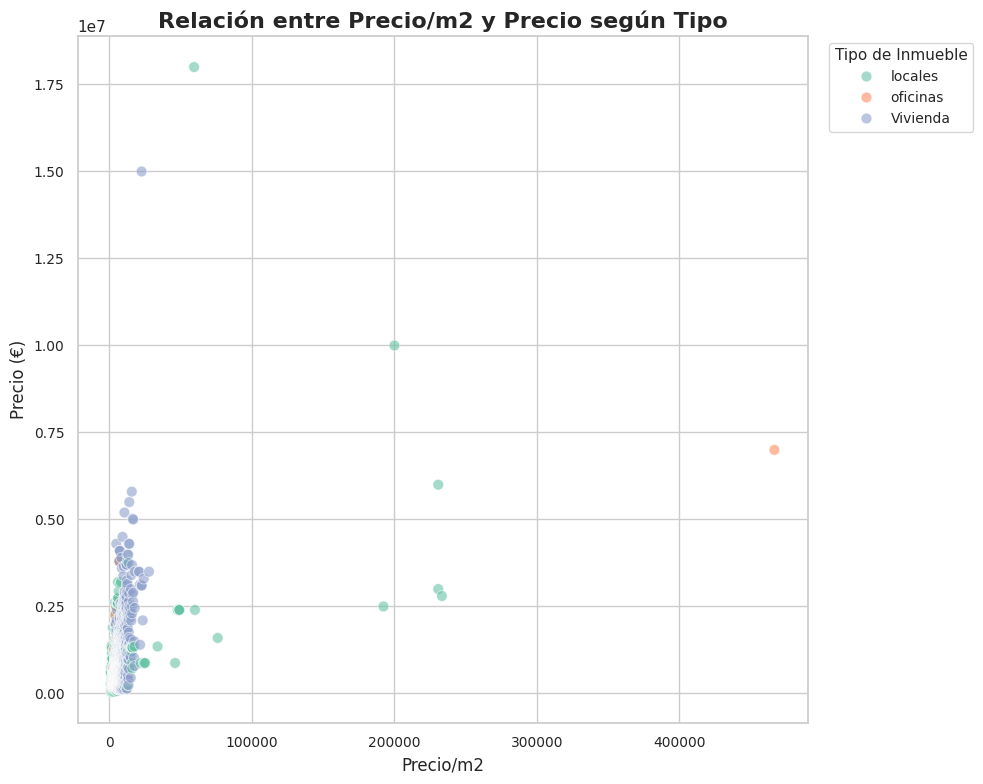

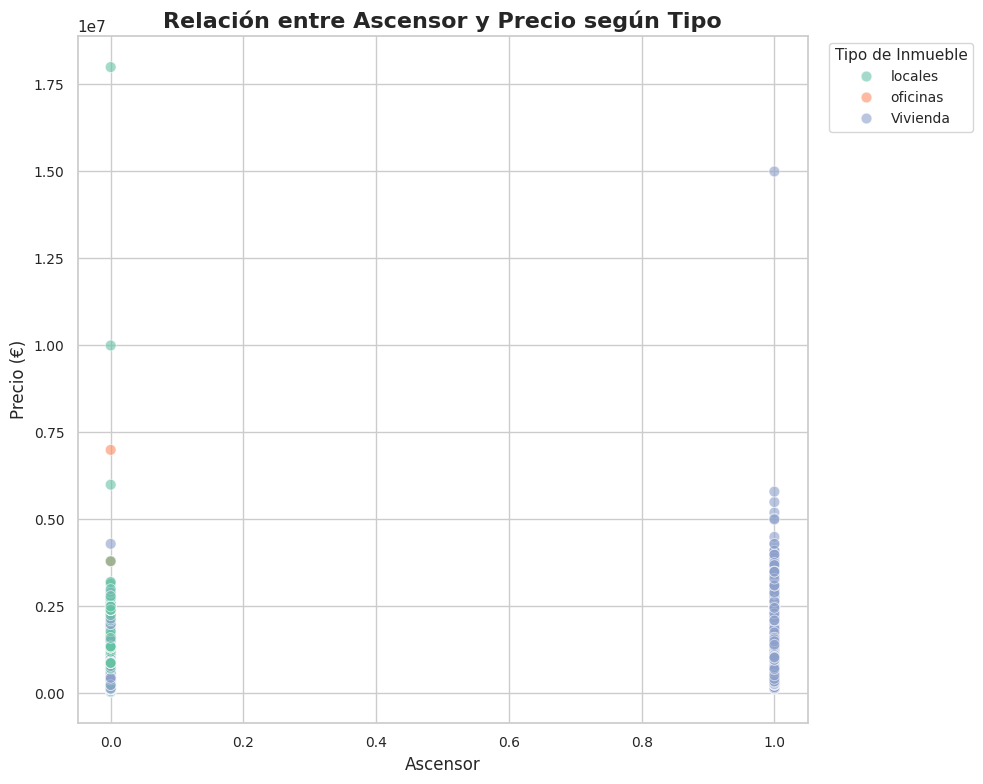

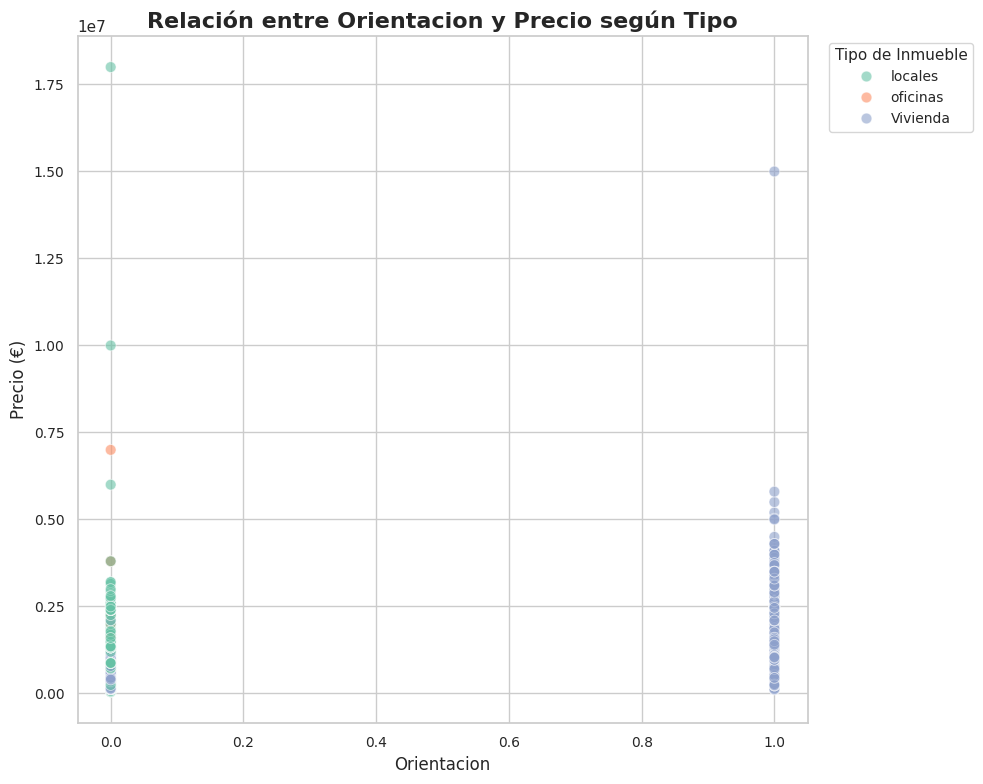

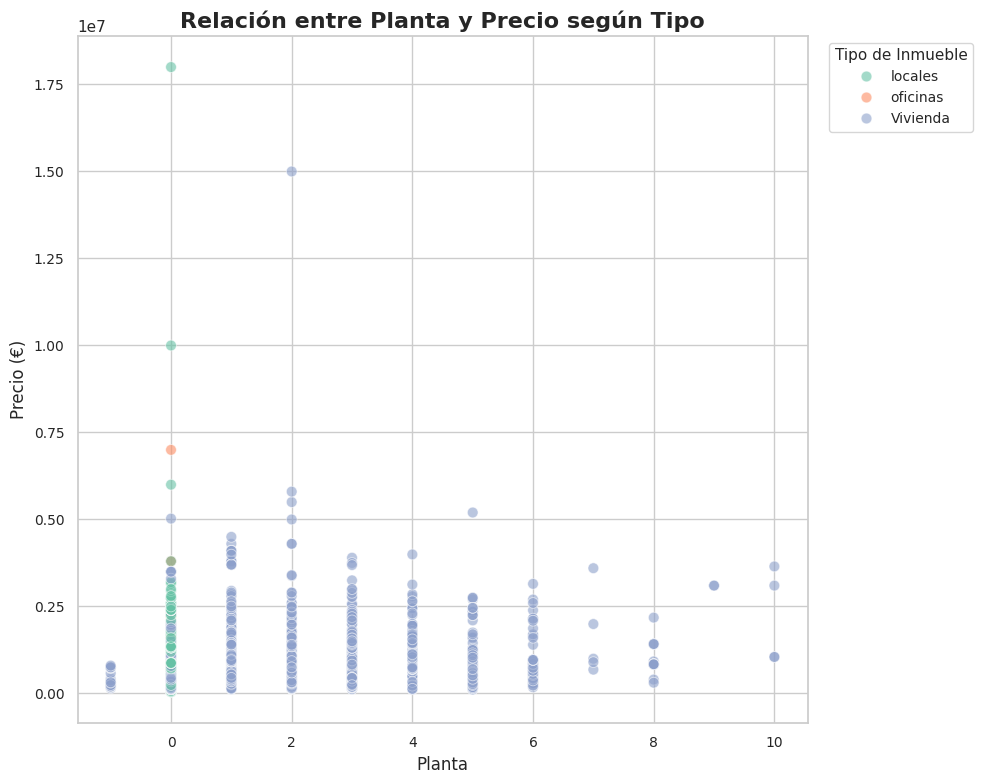

In [28]:
sns.set(style="whitegrid")

# Variables a comparar con Precio
variables = ['m2', 'Precio/m2', 'Ascensor', 'Orientacion', 'Planta']

# Detectar tipos únicos y crear una paleta automáticamente
tipos_unicos = df['Tipo'].unique()
palette = dict(zip(tipos_unicos, sns.color_palette("Set2", len(tipos_unicos))))

# Crear un gráfico de dispersión por cada variable
for var in variables:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=df,
        x=var,
        y='Precio',
        hue='Tipo',
        palette=palette,
        alpha=0.6,
        s=60
    )

    plt.title(f'Relación entre {var} y Precio según Tipo', fontsize=16, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Precio (€)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Tipo de Inmueble', title_fontsize=11, fontsize=10, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


<ipython-input-30-898ed6927041>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


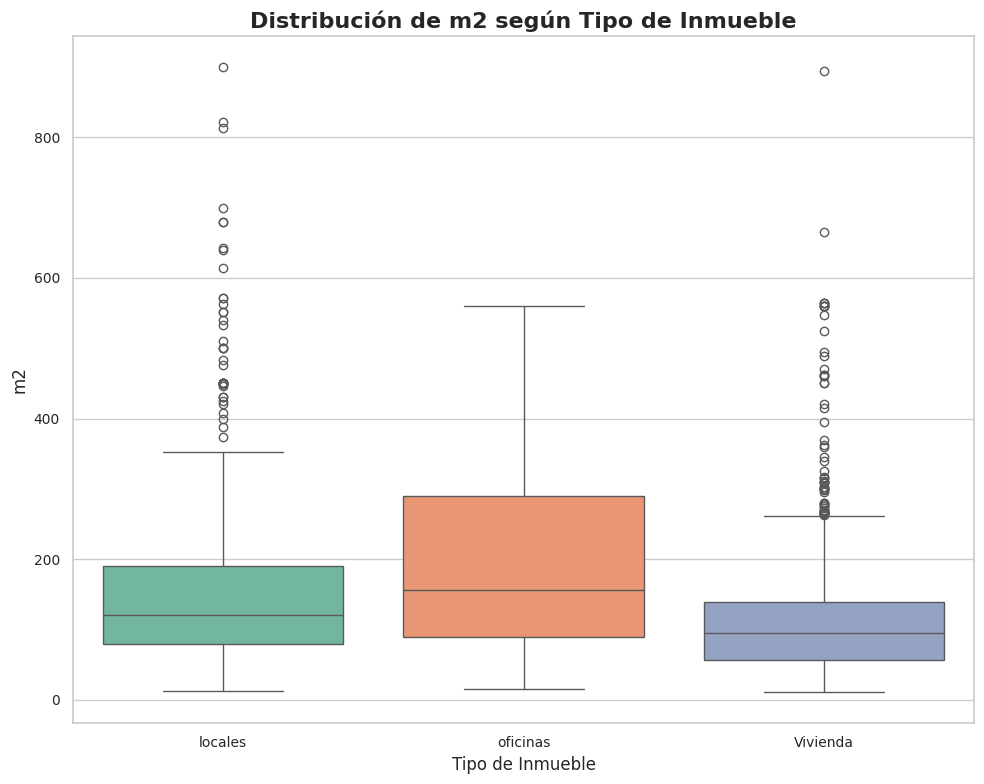

<ipython-input-30-898ed6927041>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


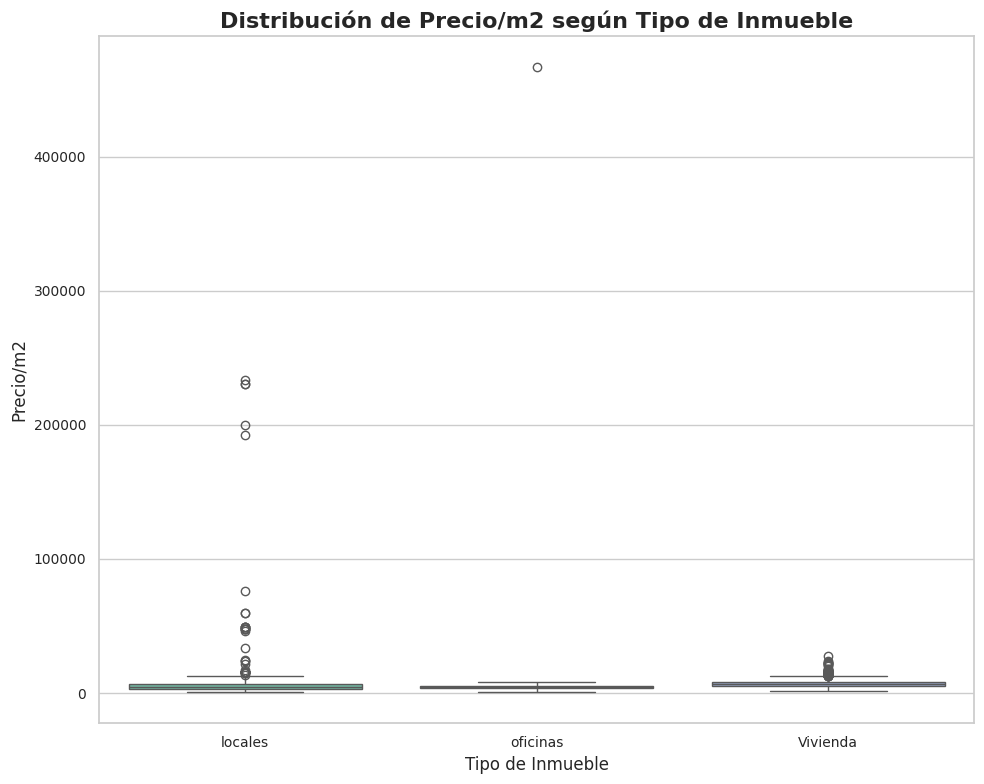

<ipython-input-30-898ed6927041>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


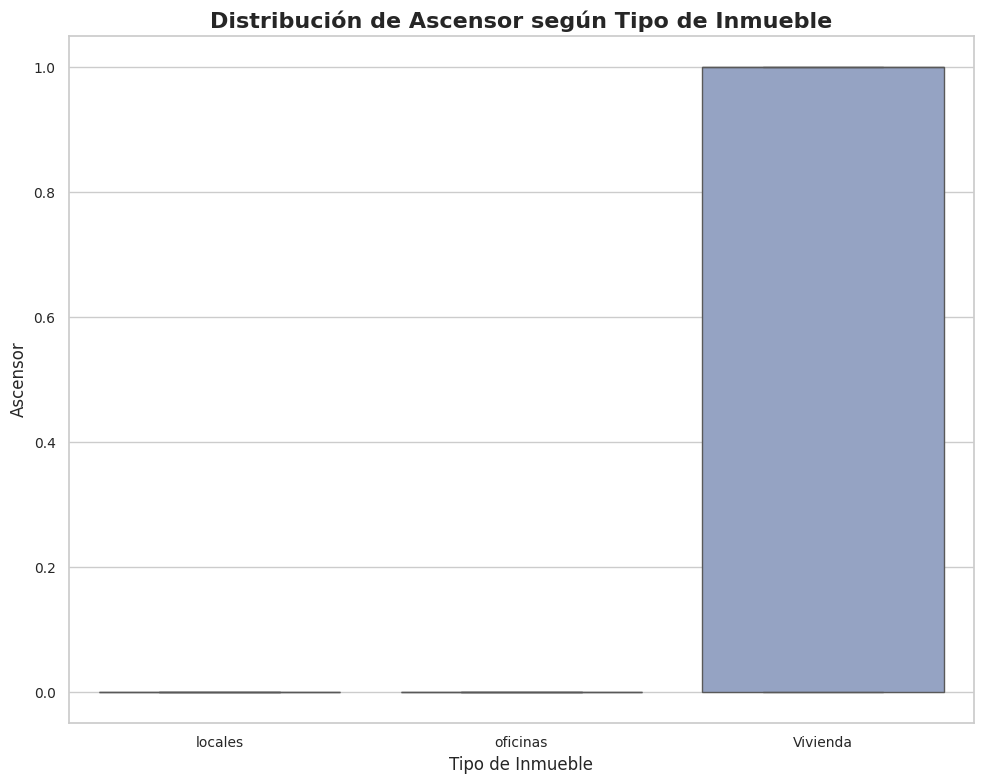

<ipython-input-30-898ed6927041>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


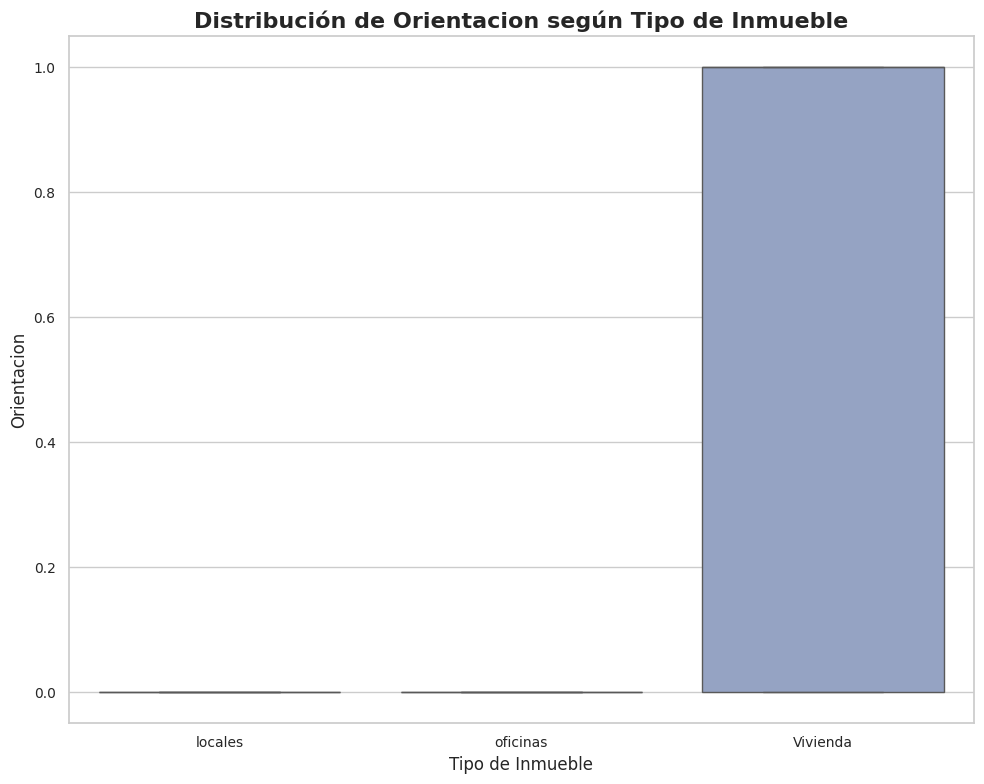

<ipython-input-30-898ed6927041>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


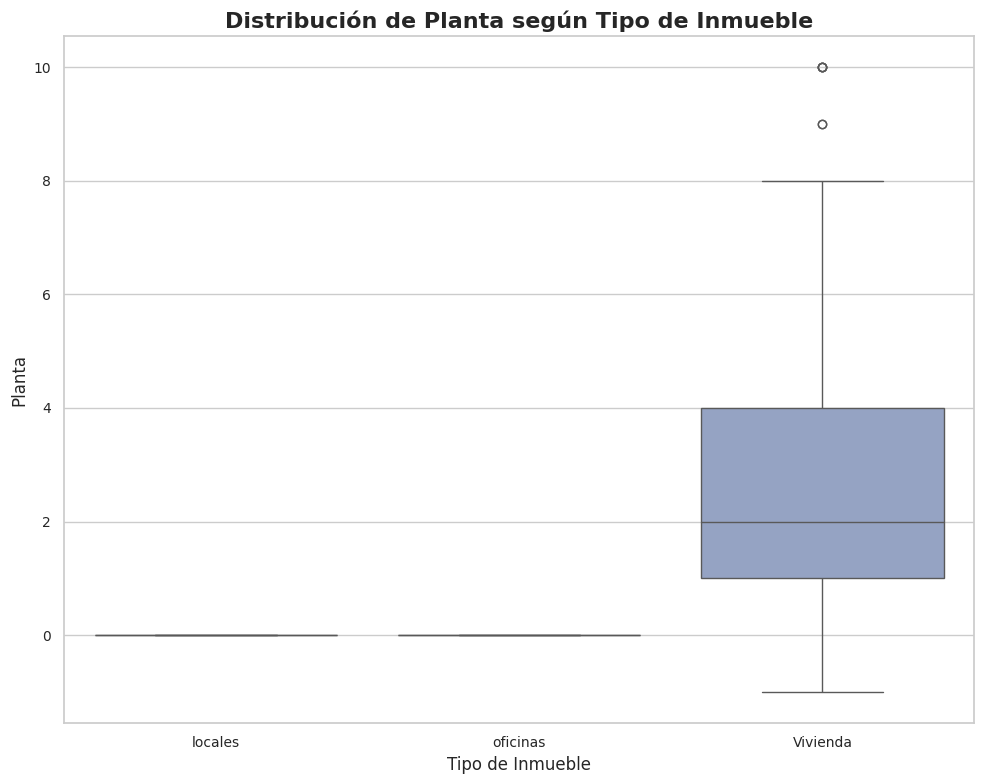

In [30]:
sns.set(style="whitegrid")

# Variables a analizar con boxplot (comparadas con Precio)
variables = ['m2', 'Precio/m2', 'Ascensor', 'Orientacion', 'Planta']

tipos_unicos = df['Tipo'].unique()
palette = dict(zip(tipos_unicos, sns.color_palette("Set2", len(tipos_unicos))))

# Crear un boxplot por cada variable
for var in variables:
    plt.figure(figsize=(10, 8))
    sns.boxplot(
        data=df,
        x='Tipo',
        y=var,
        palette=palette
    )

    plt.title(f'Distribución de {var} según Tipo de Inmueble', fontsize=16, fontweight='bold')
    plt.xlabel('Tipo de Inmueble', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


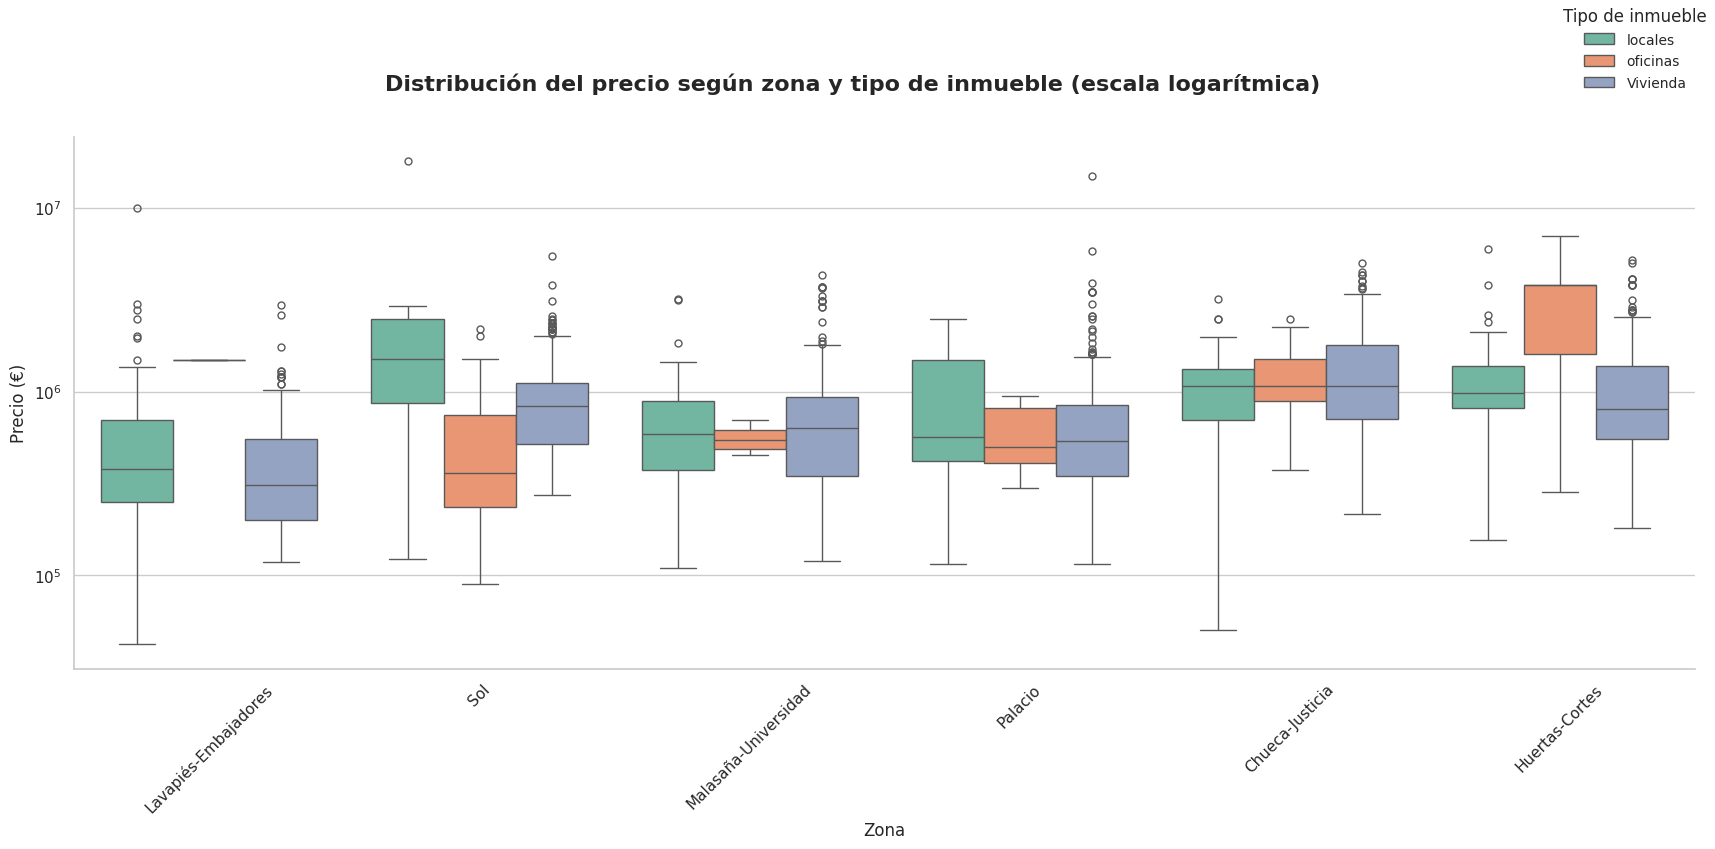

In [31]:

sns.set(style="whitegrid")

tipos_unicos = df['Tipo'].unique()
palette = dict(zip(tipos_unicos, sns.color_palette("Set2", len(tipos_unicos))))

g = sns.catplot(
    data=df,
    x='zona',
    y='Precio',
    hue='Tipo',
    kind='box',
    palette=palette,
    height=8,
    aspect=2
)

g.fig.suptitle("Distribución del precio según zona y tipo de inmueble (escala logarítmica)", fontsize=16, fontweight='bold')
g.set_axis_labels("Zona", "Precio (€)")
g.set_xticklabels(rotation=45)

# Aplicar escala logarítmica en el eje y
g.ax.set_yscale('log')

g._legend.set_title("Tipo de inmueble")
for text in g._legend.texts:
    text.set_fontsize(10)
g._legend.set_bbox_to_anchor((1, 1))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 3. Implementación de modelos de Machine Learning

In [32]:
# Se convierten las variables categóricas en dummies
df_encoded = pd.get_dummies(df, columns=['zona', 'Tipo'])  # Evitamos multicolinealidad
df_encoded

,Calle,Precio,Habitaciones,m2,Precio/m2,Ascensor,Orientacion,Planta,zona_Chueca-Justicia,zona_Huertas-Cortes,zona_Lavapiés-Embajadores,zona_Malasaña-Universidad,zona_Palacio,zona_Sol,Tipo_Vivienda,Tipo_locales,Tipo_oficinas
0,"Almacén en argumosa, 12, Lavapiés-Embajadores",280000,0,325,861.538462,0,0,0,False,False,True,False,False,False,False,True,False
1,"puerta del Sol, 1, Sol",90000,0,100,900.000000,0,0,0,False,False,False,False,False,True,False,False,True
3,Local o nave en Sol,273000,0,290,941.379310,0,0,0,False,False,False,False,False,True,False,True,False
5,"Local en calle del Amparo, Lavapiés-Embajadores",649000,0,680,954.411765,0,0,0,False,False,True,False,False,False,False,True,False
6,"Local en calle Provisiones, Lavapiés-Embajadores",589900,0,614,960.749186,0,0,0,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20452,"Local en rentabilidad en calle de las Huertas,...",6000000,0,26,230769.230769,0,0,0,False,True,False,False,False,False,False,True,False
20453,"calle de Cedaceros, Huertas-Cortes",7000000,0,15,466666.666667,0,0,0,False,True,False,False,False,False,False,False,True
20454,Local en rentabilidad en calle de la ribera de...,3000000,0,13,230769.230769,0,0,0,False,False,True,False,False,False,False,True,False
20455,"Local en calle del Mesón de Paredes, Lavapiés-...",2500000,0,13,192307.692308,0,0,0,False,False,True,False,False,False,False,True,False


In [33]:
# Se define la variable independiente y las variables dependientes
X = df_encoded.drop(columns=['Precio', 'Calle'])
y = df_encoded['Precio']

In [34]:
# Se cambian a variables categoricas codificadas como 0 y 1
X.loc[:, ["zona_Chueca-Justicia", "zona_Huertas-Cortes", "zona_Lavapiés-Embajadores", "zona_Malasaña-Universidad", "zona_Palacio", "zona_Sol", "Tipo_Vivienda", "Tipo_locales", "Tipo_oficinas"]] = X.loc[:, ["zona_Chueca-Justicia", "zona_Huertas-Cortes", "zona_Lavapiés-Embajadores", "zona_Malasaña-Universidad", "zona_Palacio", "zona_Sol", "Tipo_Vivienda","Tipo_locales", "Tipo_oficinas"]].astype(int)
X["m2"] = X["m2"].astype(float)
X["Precio/m2"] = X["Precio/m2"].astype(float)
X


<ipython-input-34-d9ee6ff3daf8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X.loc[:, ["zona_Chueca-Justicia", "zona_Huertas-Cortes", "zona_Lavapiés-Embajadores", "zona_Malasaña-Universidad", "zona_Palacio", "zona_Sol", "Tipo_Vivienda", "Tipo_locales", "Tipo_oficinas"]] = X.loc[:, ["zona_Chueca-Justicia", "zona_Huertas-Cortes", "zona_Lavapiés-Embajadores", "zona_Malasaña-Universidad", "zona_Palacio", "zona_Sol", "Tipo_Vivienda","Tipo_locales", "Tipo_oficinas"]].astype(int)
<ipython-input-34-d9ee6ff3daf8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X.loc[:, ["zona_Chueca-Justicia", "zona_Huertas-Cortes", "zona_Lavapiés-Embajad

,Habitaciones,m2,Precio/m2,Ascensor,Orientacion,Planta,zona_Chueca-Justicia,zona_Huertas-Cortes,zona_Lavapiés-Embajadores,zona_Malasaña-Universidad,zona_Palacio,zona_Sol,Tipo_Vivienda,Tipo_locales,Tipo_oficinas
0,0,325.0,861.538462,0,0,0,0,0,1,0,0,0,0,1,0
1,0,100.0,900.000000,0,0,0,0,0,0,0,0,1,0,0,1
3,0,290.0,941.379310,0,0,0,0,0,0,0,0,1,0,1,0
5,0,680.0,954.411765,0,0,0,0,0,1,0,0,0,0,1,0
6,0,614.0,960.749186,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20452,0,26.0,230769.230769,0,0,0,0,1,0,0,0,0,0,1,0
20453,0,15.0,466666.666667,0,0,0,0,1,0,0,0,0,0,0,1
20454,0,13.0,230769.230769,0,0,0,0,0,1,0,0,0,0,1,0
20455,0,13.0,192307.692308,0,0,0,0,0,1,0,0,0,0,1,0


In [35]:
# Se separan lo datos en un 80% el train y un 20% el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
initial_scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled.loc[:, ["m2", "Precio/m2"]] = initial_scaler.fit_transform(X_train_scaled.loc[:, ["m2", "Precio/m2"]])
X_test_scaled.loc[:, ["m2","Precio/m2"]] = initial_scaler.transform(X_test_scaled.loc[:, ["m2","Precio/m2"]])

In [37]:
pd.DataFrame(X_train_scaled, columns=X.columns)

,Habitaciones,m2,Precio/m2,Ascensor,Orientacion,Planta,zona_Chueca-Justicia,zona_Huertas-Cortes,zona_Lavapiés-Embajadores,zona_Malasaña-Universidad,zona_Palacio,zona_Sol,Tipo_Vivienda,Tipo_locales,Tipo_oficinas
9203,0,4.378881,-0.088102,0,0,0,0,1,0,0,0,0,0,0,1
4564,1,-0.847758,-0.169217,1,1,0,0,0,1,0,0,0,1,0,0
163,0,1.177066,-0.357826,0,0,0,0,0,0,0,1,0,0,1,0
10272,2,-0.129594,-0.063483,1,1,3,0,0,0,1,0,0,1,0,0
1727,3,-0.239313,-0.232632,1,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13900,2,-0.159517,-0.005484,1,1,4,1,0,0,0,0,0,1,0,0
8329,2,-0.408880,-0.102184,0,1,3,0,0,0,1,0,0,1,0,0
8611,0,-0.339058,-0.095612,0,0,0,0,0,0,0,1,0,0,1,0
10183,2,-0.857733,-0.065570,0,0,1,0,0,0,1,0,0,1,0,0


### Regresion Lineal Multiple

In [38]:
# Entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_scaled, y_train)

# Predicciones sobre train y test
y_train_pred = modelo_lr.predict(X_train_scaled)
y_test_pred = modelo_lr.predict(X_test_scaled)

# Métricas para TRAIN
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = (abs(y_train - y_train_pred) / y_train).mean() * 100

# Métricas para TEST
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = (abs(y_test - y_test_pred) / y_test).mean() * 100

# Mostrar resultados
print("Resultados para Regresión Lineal:")
print("---- TRAIN ----")
print("R2:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("MAPE:", mape_train)

print("---- TEST ----")
print("R2:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)
print("MAPE:", mape_test)

Resultados para Regresión Lineal:
---- TRAIN ----
R2: 0.6511158201263463
MAE: 246235.49169939934
RMSE: 499391.6505144637
MAPE: 35.723318370873706
---- TEST ----
R2: 0.4550776824166797
MAE: 255883.73642018612
RMSE: 784879.9870127698
MAPE: 31.864941633077386


### Regresion Ridge con busqueda de Hiperparametros


In [39]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_ridge = grid_search.best_estimator_

best_ridge

Ridge(alpha=100)

In [40]:
y_pred_ridge = best_ridge.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
mape_ridge = (abs(y_test - y_pred_ridge) / y_test).mean() * 100  # Mean Absolute Percentage Error

print("Para la Regresión Ridge con GridSearch los Resultados son:")
print("Mejor alpha:", grid_search.best_params_['alpha'])
print("R2", r2_ridge)
print("MAE", mae_ridge)
print("RMSE", rmse_ridge)
print("MAPE", mape_ridge)

# Para la Regresión Ridge con GridSearch los Resultados son:
# Mejor alpha: 100
# R2 0.4421461173066391
# MAE 256712.31860815975
# RMSE 794138.3845343943
# MAPE 30.21413903500183

Para la Regresión Ridge con GridSearch los Resultados son:
Mejor alpha: 100
R2 0.4421461173066391
MAE 256712.31860815978
RMSE 794138.3845343943
MAPE 30.214139035001843


# Regresión Lasso con busqueda de hiperparámetros



In [41]:
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

lasso = Lasso(max_iter=10000, random_state=42)
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
grid_search_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_search_lasso.best_estimator_
print("Mejor alpha para Lasso:", grid_search_lasso.best_params_['alpha'])

y_pred_lasso = best_lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
mape_lasso = (abs(y_test - y_pred_lasso) / y_test).mean() * 100  # Mean Absolute Percentage Error

print("\nPara la Regresión Lasso con GridSearch los Resultados son:")
print("R2:", r2_lasso)
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)
print("MAPE (%):", mape_lasso)

# Mejor alpha para Lasso: 1000

# Para la Regresión Lasso con GridSearch los Resultados son:
# R2: 0.4533998137927665
# MAE: 255614.94405323072
# RMSE: 786087.4190481905
# MAPE (%): 31.54177799200267

Mejor alpha para Lasso: 1000

Para la Regresión Lasso con GridSearch los Resultados son:
R2: 0.4533998137927664
MAE: 255614.94405323075
RMSE: 786087.4190481905
MAPE (%): 31.54177799200267


### Árbol de Decisión


In [42]:
n_iter = 5
cv_folds = 10

In [43]:
# Diccionario para almacenar métricas en cada iteración
resultados = []

for i in range(n_iter):
    initial_scaler_tt = StandardScaler()
    X_train, X_test, y_train_tt, y_test_tt = train_test_split(X, y, test_size=0.2, random_state=i)

    X_train_scaled_dt = X_train.copy()
    X_test_scaled_dt = X_test.copy()

    X_train_scaled_dt.loc[:,["m2", "Precio/m2"]] = initial_scaler_tt.fit_transform(X_train_scaled_dt.loc[:,["m2", "Precio/m2"]])
    X_test_scaled_dt.loc[:, ["m2", "Precio/m2"]] = initial_scaler_tt.transform(X_test_scaled_dt.loc[:, ["m2", "Precio/m2"]])

    modelo_dt_tt = DecisionTreeRegressor(max_depth=10, random_state=42)

    modelo_dt_tt.fit(X_train_scaled_dt, y_train_tt)

    y_pred_dt_tt = modelo_dt_tt.predict(X_test_scaled_dt)

    r2_dt_tt = r2_score(y_test_tt, y_pred_dt_tt)
    mae_dt_tt = mean_absolute_error(y_test_tt, y_pred_dt_tt)
    rmse_dt_tt = root_mean_squared_error(y_test_tt, y_pred_dt_tt)
    mape_dt_tt = (abs(y_test_tt - y_pred_dt_tt) / y_test_tt).mean() * 100

    resultados.append({
        'R²_Test': r2_dt_tt,
        'MAE_Test': mae_dt_tt,
        'RMSE_Test': rmse_dt_tt,
        'MAPE_Test': mape_dt_tt
    })

resultados = np.array([[r['R²_Test'], r['MAE_Test'], r['RMSE_Test'], r['MAPE_Test']] for r in resultados])


print(f"Resultados promedio tras {n_iter} iteraciones de train split:")
print(f"  - R² promedio: {resultados[:, 0].mean()} | std: {resultados[:, 0].std()}")
print(f"  - MAE promedio: {resultados[:, 1].mean()} | std: {resultados[:, 1].std()}")
print(f"  - RMSE promedio: {resultados[:, 2].mean()} | std: {resultados[:, 2].std()}")
print(f"  - MAPE promedio: {resultados[:, 3].mean()}% | std: {resultados[:, 3].std()}%")

# Resultados promedio tras 5 iteraciones de train split:
#   - R² promedio: 0.9108447696225085 | std: 0.08329349654896291
#   - MAE promedio: 57256.102860632396 | std: 8089.138523404728
#   - RMSE promedio: 240187.66357449838 | std: 131796.14905730903
#   - MAPE promedio: 6.133062516950483% | std: 0.55127012578679%

Resultados promedio tras 5 iteraciones de train split:
  - R² promedio: 0.9108447696225085 | std: 0.08329349654896291
  - MAE promedio: 57256.102860632396 | std: 8089.138523404728
  - RMSE promedio: 240187.66357449838 | std: 131796.14905730903
  - MAPE promedio: 6.133062516950483% | std: 0.55127012578679%


In [44]:

modelo_dt_cv = DecisionTreeRegressor(max_depth=10, random_state=42)

cv_results = cross_validate(
    modelo_dt_cv, X_train_scaled, y_train, cv=cv_folds,
    scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
    return_train_score=True
)

print(f"===== Árbol de Decisión con Cross Validation con {cv_folds}-folds =====")
print(f"Cross Validation Resultados con {cv_folds}-folds")
print(f"  - R² promedio (CV): {cv_results['test_r2'].mean()}  | std: {cv_results['test_r2'].std()}")
print(f"  - MAE promedio (CV): {(-cv_results['test_neg_mean_absolute_error']).mean()}  | std: {(-cv_results['test_neg_mean_absolute_error']).std()}")
print(f"  - RMSE promedio (CV): {(-cv_results['test_neg_root_mean_squared_error']).mean()} | std: {(-cv_results['test_neg_root_mean_squared_error']).std()}")
print("\n")


modelo_dt_cv.fit(X_train_scaled, y_train)

y_pred_dt_cv = modelo_dt_cv.predict(X_test_scaled)

r2_dt = r2_score(y_test, y_pred_dt_cv)
mae_dt = mean_absolute_error(y_test, y_pred_dt_cv)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt_cv)
mape_dt = (abs(y_test - y_pred_dt_cv) / y_test).mean() * 100

print("Para el Arbol de Decisión final los Resultados son:")
print(f"R2: {r2_dt}")
print(f"MAE: {mae_dt}")
print(f"RMSE: {rmse_dt}")
print(f"MAPE: {mape_dt}%")


# ===== Árbol de Decisión con Cross Validation con 10-folds =====
# Cross Validation Resultados con 10-folds
#   - R² promedio (CV): 0.9233159228445391  | std: 0.12468282297475385
#   - MAE promedio (CV): 62395.23204216084  | std: 25114.27037458732
#   - RMSE promedio (CV): 214130.69589350637 | std: 237336.8967222234


# Para el Arbol de Decisión final los Resultados son:
# R2: 0.9690699910246556
# MAE: 54098.88195197797
# RMSE: 186993.2720318955
# MAPE: 5.437277489717158%

===== Árbol de Decisión con Cross Validation con 10-folds =====
Cross Validation Resultados con 10-folds
  - R² promedio (CV): 0.9233159228445391  | std: 0.12468282297475385
  - MAE promedio (CV): 62395.23204216084  | std: 25114.27037458732
  - RMSE promedio (CV): 214130.69589350637 | std: 237336.8967222234


Para el Arbol de Decisión final los Resultados son:
R2: 0.9690699910246556
MAE: 54098.88195197797
RMSE: 186993.2720318955
MAPE: 5.437277489717158%


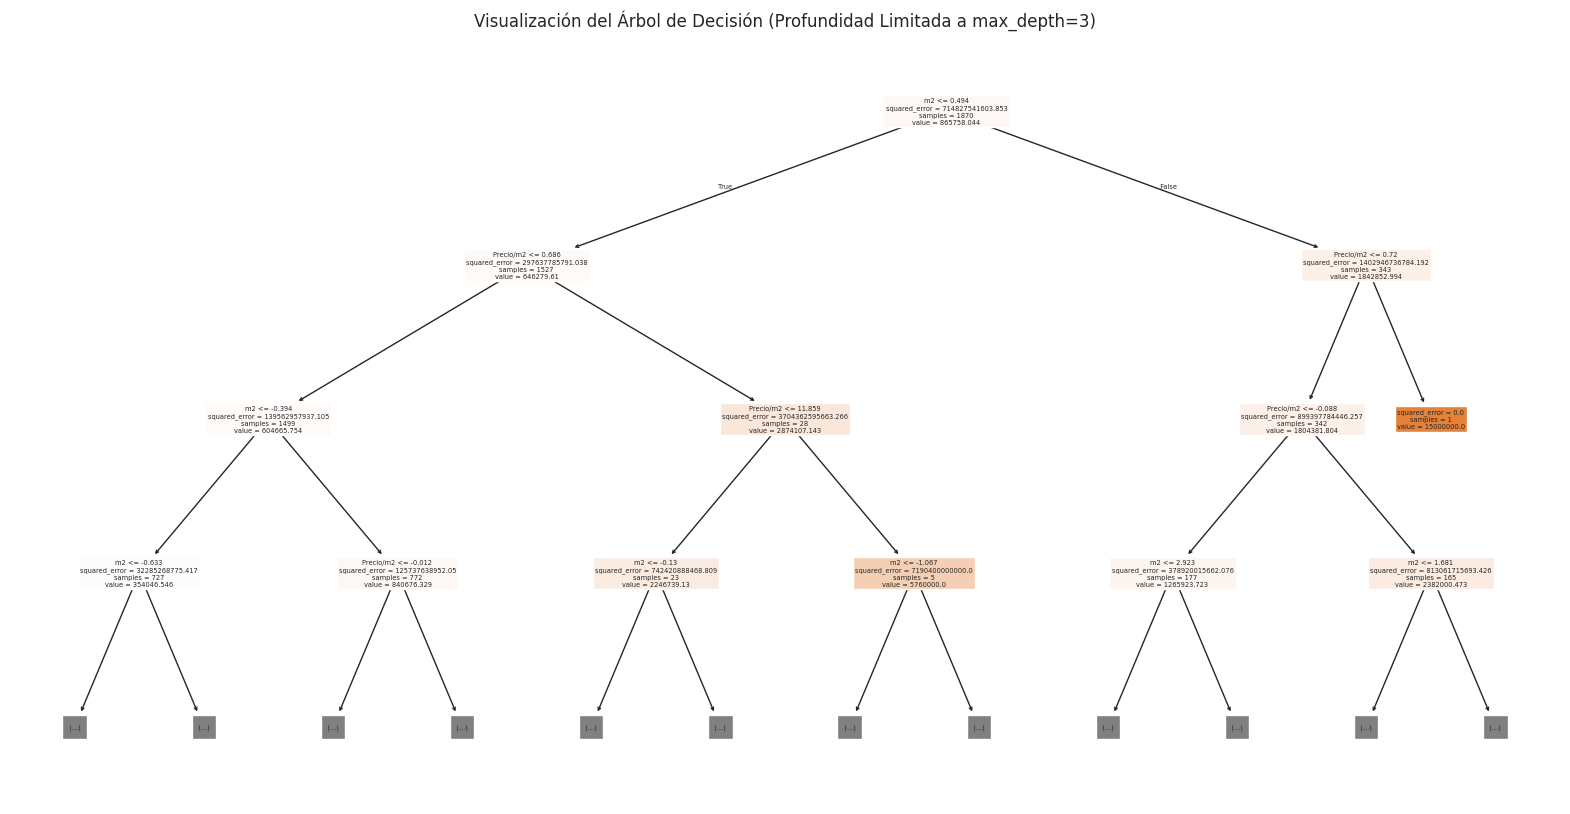

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_dt_cv, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Visualización del Árbol de Decisión (Profundidad Limitada a max_depth=3)")
plt.show()

### Random Forest


In [46]:
# Definir el modelo
modelo_rf_cv = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
cv_folds = 5  # Número de particiones para cross-validation

# Realizar cross-validation
cv_results = cross_validate(
    modelo_rf_cv, X_train_scaled, y_train, cv=cv_folds,
    scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
    return_train_score=True
)

print(f"===== Random Forest con Cross Validation con {cv_folds}-folds =====")
print(f"Cross Validation Resultados con {cv_folds}-folds")
print(f"  - R² promedio (CV): {cv_results['test_r2'].mean()}  | std: {cv_results['test_r2'].std()}")
print(f"  - MAE promedio (CV): {(-cv_results['test_neg_mean_absolute_error']).mean()}  | std: {(-cv_results['test_neg_mean_absolute_error']).std()}")
print(f"  - RMSE promedio (CV): {(-cv_results['test_neg_root_mean_squared_error']).mean()} | std: {(-cv_results['test_neg_root_mean_squared_error']).std()}")
print("\n")

# Ajustar el modelo con todos los datos de entrenamiento
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelo_rf.fit(X_train_scaled, y_train)

y_pred_rf = modelo_rf.predict(X_test_scaled)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mape_rf = (abs(y_test - y_pred_rf) / y_test).mean() * 100  # Mean Absolute Percentage Error

print("Para el Random Forest los Resultados son:")
print("R2", r2_rf)
print("MAE", mae_rf)
print("RMSE", rmse_rf)
print("MAPE", mape_rf)


===== Random Forest con Cross Validation con 5-folds =====
Cross Validation Resultados con 5-folds
  - R² promedio (CV): 0.8899262479032298  | std: 0.11177392593530273
  - MAE promedio (CV): 46486.25333020421  | std: 11697.384670666257
  - RMSE promedio (CV): 266344.21480349253 | std: 187061.4199982727


Para el Random Forest los Resultados son:
R2 0.8937160751123647
MAE 40407.412210888775
RMSE 346632.87552848156
MAPE 2.685594806828897


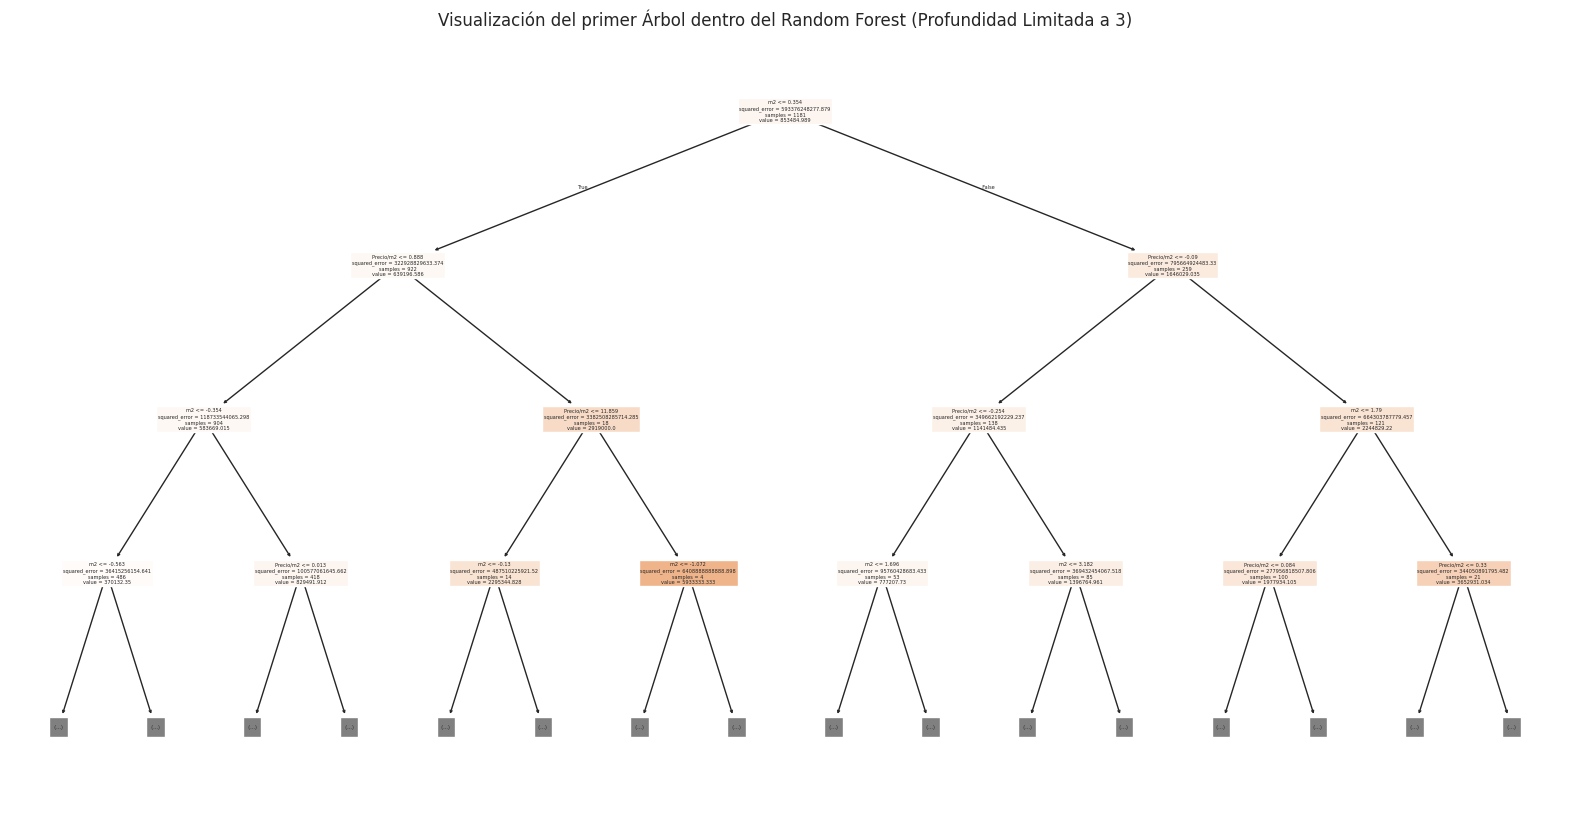

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_rf.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title("Visualización del primer Árbol dentro del Random Forest (Profundidad Limitada a 3)")
plt.show()


### Regresión Polinómica


In [48]:
cv_folds = 10

diccionario_modelos = {}
diccionario_poly_features = {}
diccionario_scalers = {}

for grado in range(2, 5):
    print(f"===== Regresión Polinómica (Grado = {grado}) =====")

    poly_transformer = PolynomialFeatures(degree=grado, include_bias=False)
    X_train_poly = poly_transformer.fit_transform(X_train_scaled)
    X_test_poly = poly_transformer.transform(X_test_scaled)

    scaler_poly = StandardScaler()
    X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler_poly.transform(X_test_poly)

    modelo_poly = LinearRegression()

    cv_results_poly = cross_validate(
        modelo_poly, X_train_poly_scaled, y_train,
        cv=cv_folds,
        scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']
    )

    print(f"Cross Validation Resultados con {cv_folds}-folds")
    print(f"  - R² promedio (CV): {cv_results_poly['test_r2'].mean()}  | std: {cv_results_poly['test_r2'].std()}")
    print(f"  - MAE promedio (CV): {-cv_results_poly['test_neg_mean_absolute_error'].mean()}  | std: {cv_results_poly['test_neg_mean_absolute_error'].std()}")
    print(f"  - RMSE promedio (CV): {-cv_results_poly['test_neg_root_mean_squared_error'].mean()} | std: {cv_results_poly['test_neg_root_mean_squared_error'].std()}")
    modelo_poly.fit(X_train_poly_scaled, y_train)

    y_pred_poly = modelo_poly.predict(X_test_poly_scaled)

    r2_poly = r2_score(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    rmse_poly = root_mean_squared_error(y_test, y_pred_poly)  # RMSE
    mape_poly = (abs(y_test - y_pred_poly) / y_test).mean() * 100  # Mean Absolute Percentage Error

    diccionario_poly_features[f"Grado {grado}"] = poly_transformer
    diccionario_scalers[f"Grado {grado}"] = scaler_poly
    diccionario_modelos[f"Grado {grado}"] = modelo_poly

    print("\nMétricas en el Conjunto de Prueba:")
    print(f"  - R²:    {r2_poly}")
    print(f"  - MAE:   {mae_poly}")
    print(f"  - RMSE:  {rmse_poly}")
    print(f"  - MAPE:  {mape_poly}%")
    print("\n")

# ===== Regresión Polinómica (Grado = 2) =====
# Cross Validation Resultados con 10-folds
#   - R² promedio (CV): 1.0  | std: 0.0
#   - MAE promedio (CV): 3.3832035640025522e-09  | std: 7.127263041199686e-10
#   - RMSE promedio (CV): 4.586193420786869e-09 | std: 8.863334170845587e-10

# Métricas en el Conjunto de Prueba:
#   - R²:    0.9999066723975111
#   - MAE:   474.808063829427
#   - RMSE:  10271.66892075349
#   - MAPE:  0.031866313009130294%


# ===== Regresión Polinómica (Grado = 3) =====
# Cross Validation Resultados con 10-folds
#   - R² promedio (CV): 0.9999742931954465  | std: 7.712041366044752e-05
#   - MAE promedio (CV): 225.91654758625145  | std: 677.7496427396806
#   - RMSE promedio (CV): 2201.1991838593635 | std: 6603.597551429485

# Métricas en el Conjunto de Prueba:
#   - R²:    0.9997138377711174
#   - MAE:   831.4175476925313
#   - RMSE:  17986.311597101663
#   - MAPE:  0.055799835415867687%


# ===== Regresión Polinómica (Grado = 4) =====
# Cross Validation Resultados con 10-folds
#   - R² promedio (CV): 0.9381147199834178  | std: 0.1832585771093583
#   - MAE promedio (CV): 5335.274278920991  | std: 13114.494998262617
#   - RMSE promedio (CV): 71918.15872353976 | std: 179700.5024079337

# Métricas en el Conjunto de Prueba:
#   - R²:    0.9999110923601359
#   - MAE:   576.013372317062
#   - RMSE:  10025.487476704
#   - MAPE:  0.07035699946086192%

===== Regresión Polinómica (Grado = 2) =====
Cross Validation Resultados con 10-folds
  - R² promedio (CV): 1.0  | std: 0.0
  - MAE promedio (CV): 3.0743294360644037e-09  | std: 7.997656423623334e-10
  - RMSE promedio (CV): 6.6698663730562334e-09 | std: 7.949643374831841e-09

Métricas en el Conjunto de Prueba:
  - R²:    1.0
  - MAE:   4.697781111885849e-09
  - RMSE:  5.857814648404854e-09
  - MAPE:  8.56976780255523e-13%


===== Regresión Polinómica (Grado = 3) =====
Cross Validation Resultados con 10-folds
  - R² promedio (CV): 0.9999993066608426  | std: 2.0800174723278884e-06
  - MAE promedio (CV): 37.10196053550621  | std: 111.30588155738056
  - RMSE promedio (CV): 361.4998818312968 | std: 1084.499644927566

Métricas en el Conjunto de Prueba:
  - R²:    0.9998637086284285
  - MAE:   573.7823865179311
  - RMSE:  12412.810893241936
  - MAPE:  0.03850888500147697%


===== Regresión Polinómica (Grado = 4) =====
Cross Validation Resultados con 10-folds
  - R² promedio (CV): 0.9381370005

In [49]:

n_iter = 5

for grado in range(2, 5):
    print(f"===== Regresión Polinómica (Grado = {grado}) =====")

    resultados = []

    for i in range(n_iter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        poly_transformer = PolynomialFeatures(degree=grado, include_bias=False)
        X_train_poly = poly_transformer.fit_transform(X_train)
        X_test_poly = poly_transformer.transform(X_test)

        scaler_poly = StandardScaler()
        X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
        X_test_poly_scaled = scaler_poly.transform(X_test_poly)

        modelo_poly = LinearRegression()
        modelo_poly.fit(X_train_poly_scaled, y_train)

        y_pred_poly = modelo_poly.predict(X_test_poly_scaled)
        r2_poly = r2_score(y_test, y_pred_poly)
        mae_poly = mean_absolute_error(y_test, y_pred_poly)
        rmse_poly = root_mean_squared_error(y_test, y_pred_poly)
        mape_poly = (abs(y_test - y_pred_poly) / y_test).mean() * 100

        resultados.append([r2_poly, mae_poly, rmse_poly, mape_poly])

    resultados = np.array(resultados)

    print(f"Resultados promedio tras {n_iter} iteraciones de train split:")
    print(f"  - R² promedio: {resultados[:, 0].mean()} | std: {resultados[:, 0].std()}")
    print(f"  - MAE promedio: {resultados[:, 1].mean()} | std: {resultados[:, 1].std()}")
    print(f"  - RMSE promedio: {resultados[:, 2].mean()} | std: {resultados[:, 2].std()}")
    print(f"  - MAPE promedio: {resultados[:, 3].mean()}% | std: {resultados[:, 3].std()}%")

    print("\n")

# ===== Regresión Polinómica (Grado = 2) =====
# Resultados promedio tras 5 iteraciones de train split:
#   - R² promedio: 1.0 | std: 0.0
#   - MAE promedio: 2.1285098842066576e-09 | std: 3.246791095725451e-10
#   - RMSE promedio: 2.964017939937037e-09 | std: 2.852651214189812e-10
#   - MAPE promedio: 3.84725808907389e-13% | std: 8.330669695867916e-14%


# ===== Regresión Polinómica (Grado = 3) =====
# Resultados promedio tras 5 iteraciones de train split:
#   - R² promedio: 0.999999989868239 | std: 2.0263521882668555e-08
#   - MAE promedio: 2.854190986213358 | std: 5.708381967041823
#   - RMSE promedio: 43.7086728162771 | std: 87.41734560054289
#   - MAPE promedio: 0.0005265905421161878% | std: 0.0010531810835562744%


# ===== Regresión Polinómica (Grado = 4) =====
# Resultados promedio tras 5 iteraciones de train split:
#   - R² promedio: 0.9999044070203101 | std: 8.188953656328159e-05
#   - MAE promedio: 402.6913303397816 | std: 333.91040892130076
#   - RMSE promedio: 6298.742230880145 | std: 5119.950872236145
#   - MAPE promedio: 0.10666719245044558% | std: 0.1026653593740757

===== Regresión Polinómica (Grado = 2) =====
Resultados promedio tras 5 iteraciones de train split:
  - R² promedio: 1.0 | std: 0.0
  - MAE promedio: 1.79053232487705e-09 | std: 4.626651948063317e-10
  - RMSE promedio: 2.6652642337784254e-09 | std: 3.952019745501706e-10
  - MAPE promedio: 3.031438736794741e-13% | std: 1.1245279500328757e-13%


===== Regresión Polinómica (Grado = 3) =====
Resultados promedio tras 5 iteraciones de train split:
  - R² promedio: 1.0 | std: 0.0
  - MAE promedio: 2.748421472935086e-09 | std: 5.107854361397108e-10
  - RMSE promedio: 1.1637557256074899e-08 | std: 1.1082853601498435e-08
  - MAPE promedio: 4.033002842539824e-13% | std: 8.665600026337601e-14%


===== Regresión Polinómica (Grado = 4) =====
Resultados promedio tras 5 iteraciones de train split:
  - R² promedio: 0.9998863598012255 | std: 9.789841836981097e-05
  - MAE promedio: 421.33954001946967 | std: 345.6795859371673
  - RMSE promedio: 6800.199791795296 | std: 5498.366193498718
  - MAPE promedio:

In [54]:
poly_transformer = diccionario_poly_features[f"Grado 2"]
scaler_poly = diccionario_scalers[f"Grado 2"]
modelo_poly = diccionario_modelos[f"Grado 2"]

intercepto = modelo_poly.intercept_
coeficientes = modelo_poly.coef_

nombres_variables = poly_transformer.get_feature_names_out()

ecuacion = f"y = {intercepto:.4f} "
for coef, nombre in zip(coeficientes, nombres_variables):
    ecuacion += f"+ ({coef:.4f})*{nombre} "

print("Ecuación de la regresión polinómica:")
print(ecuacion)

# Ecuación de la regresión polinómica:
# y = 865758.0439 + (45.8997)*Habitaciones + (256465.8261)*m2 + (639367.8838)*Precio/m2 + (28348.2699)*Ascensor + (1486.8665)*Orientacion + (-19783.4008)*Planta + (-916.1681)*zona_Chueca-Justicia + (28885.5104)*zona_Huertas-Cortes + (11902.5213)*zona_Lavapiés-Embajadores + (11143.1595)*zona_Malasaña-Universidad + (5955.2430)*zona_Palacio + (-35296.6106)*zona_Sol + (23602.1854)*Tipo_Vivienda + (48858.3887)*Tipo_locales + (21590.8686)*Tipo_oficinas + (0.0000)*Habitaciones^2 + (-0.0000)*Habitaciones m2 + (-0.0000)*Habitaciones Precio/m2 + (0.0000)*Habitaciones Ascensor + (-0.0000)*Habitaciones Orientacion + (0.0000)*Habitaciones Planta + (-5605.4363)*Habitaciones zona_Chueca-Justicia + (-4785.7316)*Habitaciones zona_Huertas-Cortes + (-5346.7202)*Habitaciones zona_Lavapiés-Embajadores + (-6524.9043)*Habitaciones zona_Malasaña-Universidad + (-4741.0648)*Habitaciones zona_Palacio + (-5274.5096)*Habitaciones zona_Sol + (8934.6613)*Habitaciones Tipo_Vivienda + (2284.8178)*Habitaciones Tipo_locales + (-7073.4837)*Habitaciones Tipo_oficinas + (-0.0000)*m2^2 + (1643154.2905)*m2 Precio/m2 + (-0.0000)*m2 Ascensor + (0.0000)*m2 Orientacion + (0.0000)*m2 Planta + (102434.7849)*m2 zona_Chueca-Justicia + (113082.5062)*m2 zona_Huertas-Cortes + (126484.3034)*m2 zona_Lavapiés-Embajadores + (124027.9868)*m2 zona_Malasaña-Universidad + (104203.8835)*m2 zona_Palacio + (120464.9709)*m2 zona_Sol + (205507.8613)*m2 Tipo_Vivienda + (175717.6371)*m2 Tipo_locales + (64629.8079)*m2 Tipo_oficinas + (-0.0000)*Precio/m2^2 + (0.0000)*Precio/m2 Ascensor + (0.0000)*Precio/m2 Orientacion + (0.0000)*Precio/m2 Planta + (44653.8738)*Precio/m2 zona_Chueca-Justicia + (444831.4375)*Precio/m2 zona_Huertas-Cortes + (363713.6815)*Precio/m2 zona_Lavapiés-Embajadores + (58719.2467)*Precio/m2 zona_Malasaña-Universidad + (48910.2618)*Precio/m2 zona_Palacio + (126244.9778)*Precio/m2 zona_Sol + (105674.3462)*Precio/m2 Tipo_Vivienda + (495195.8362)*Precio/m2 Tipo_locales + (457436.6189)*Precio/m2 Tipo_oficinas + (-1434.3399)*Ascensor^2 + (-0.0000)*Ascensor Orientacion + (-0.0000)*Ascensor Planta + (-14510.0174)*Ascensor zona_Chueca-Justicia + (-11154.6138)*Ascensor zona_Huertas-Cortes + (-14023.2775)*Ascensor zona_Lavapiés-Embajadores + (-16957.8298)*Ascensor zona_Malasaña-Universidad + (-13843.0324)*Ascensor zona_Palacio + (-13084.6739)*Ascensor zona_Sol + (-3145.0180)*Ascensor Tipo_Vivienda + (-658.3910)*Ascensor Tipo_locales + (874.0123)*Ascensor Tipo_oficinas + (1144.5908)*Orientacion^2 + (-0.0000)*Orientacion Planta + (-1416.6116)*Orientacion zona_Chueca-Justicia + (-1171.6978)*Orientacion zona_Huertas-Cortes + (-1385.4091)*Orientacion zona_Lavapiés-Embajadores + (-1695.4309)*Orientacion zona_Malasaña-Universidad + (-1423.4029)*Orientacion zona_Palacio + (-1399.4088)*Orientacion zona_Sol + (-311.8284)*Orientacion Tipo_Vivienda + (0.0000)*Orientacion Tipo_locales + (-0.0000)*Orientacion Tipo_oficinas + (0.0000)*Planta^2 + (22887.8512)*Planta zona_Chueca-Justicia + (18674.2507)*Planta zona_Huertas-Cortes + (22018.1068)*Planta zona_Lavapiés-Embajadores + (27041.8257)*Planta zona_Malasaña-Universidad + (23122.4203)*Planta zona_Palacio + (25890.3151)*Planta zona_Sol + (-22704.2614)*Planta Tipo_Vivienda + (0.0000)*Planta Tipo_locales + (0.0000)*Planta Tipo_oficinas + (15027.8852)*zona_Chueca-Justicia^2 + (0.0000)*zona_Chueca-Justicia zona_Huertas-Cortes + (0.0000)*zona_Chueca-Justicia zona_Lavapiés-Embajadores + (0.0000)*zona_Chueca-Justicia zona_Malasaña-Universidad + (0.0000)*zona_Chueca-Justicia zona_Palacio + (0.0000)*zona_Chueca-Justicia zona_Sol + (-1126.1682)*zona_Chueca-Justicia Tipo_Vivienda + (-6358.5603)*zona_Chueca-Justicia Tipo_locales + (-14288.6117)*zona_Chueca-Justicia Tipo_oficinas + (27167.7831)*zona_Huertas-Cortes^2 + (0.0000)*zona_Huertas-Cortes zona_Lavapiés-Embajadores + (0.0000)*zona_Huertas-Cortes zona_Malasaña-Universidad + (0.0000)*zona_Huertas-Cortes zona_Palacio + (0.0000)*zona_Huertas-Cortes zona_Sol + (-41354.4575)*zona_Huertas-Cortes Tipo_Vivienda + (-23036.9007)*zona_Huertas-Cortes Tipo_locales + (-19561.2007)*zona_Huertas-Cortes Tipo_oficinas + (-376.5226)*zona_Lavapiés-Embajadores^2 + (0.0000)*zona_Lavapiés-Embajadores zona_Malasaña-Universidad + (0.0000)*zona_Lavapiés-Embajadores zona_Palacio + (0.0000)*zona_Lavapiés-Embajadores zona_Sol + (3116.3579)*zona_Lavapiés-Embajadores Tipo_Vivienda + (-6933.2146)*zona_Lavapiés-Embajadores Tipo_locales + (0.0000)*zona_Lavapiés-Embajadores Tipo_oficinas + (17011.7999)*zona_Malasaña-Universidad^2 + (0.0000)*zona_Malasaña-Universidad zona_Palacio + (0.0000)*zona_Malasaña-Universidad zona_Sol + (-11309.0271)*zona_Malasaña-Universidad Tipo_Vivienda + (-14693.3699)*zona_Malasaña-Universidad Tipo_locales + (-11933.2574)*zona_Malasaña-Universidad Tipo_oficinas + (10433.6068)*zona_Palacio^2 + (0.0000)*zona_Palacio zona_Sol + (-2669.5221)*zona_Palacio Tipo_Vivienda + (-8168.7831)*zona_Palacio Tipo_locales + (-13483.4733)*zona_Palacio Tipo_oficinas + (-9133.6547)*zona_Sol^2 + (52518.3366)*zona_Sol Tipo_Vivienda + (15645.5481)*zona_Sol Tipo_locales + (-5042.4892)*zona_Sol Tipo_oficinas + (42548.6210)*Tipo_Vivienda^2 + (0.0000)*Tipo_Vivienda Tipo_locales + (0.0000)*Tipo_Vivienda Tipo_oficinas + (30540.4084)*Tipo_locales^2 + (0.0000)*Tipo_locales Tipo_oficinas + (32649.4696)*Tipo_oficinas^2


Ecuación de la regresión polinómica:
y = 865758.0439 + (0.0000)*Habitaciones + (271529.0255)*m2 + (638531.8345)*Precio/m2 + (0.0000)*Ascensor + (0.0000)*Orientacion + (0.0000)*Planta + (0.0000)*zona_Chueca-Justicia + (-0.0000)*zona_Huertas-Cortes + (-0.0000)*zona_Lavapiés-Embajadores + (-0.0000)*zona_Malasaña-Universidad + (-0.0000)*zona_Palacio + (0.0000)*zona_Sol + (-0.0000)*Tipo_Vivienda + (-0.0000)*Tipo_locales + (-0.0000)*Tipo_oficinas + (-0.0000)*Habitaciones^2 + (0.0000)*Habitaciones m2 + (-0.0000)*Habitaciones Precio/m2 + (0.0000)*Habitaciones Ascensor + (0.0000)*Habitaciones Orientacion + (0.0000)*Habitaciones Planta + (0.0000)*Habitaciones zona_Chueca-Justicia + (0.0000)*Habitaciones zona_Huertas-Cortes + (-0.0000)*Habitaciones zona_Lavapiés-Embajadores + (-0.0000)*Habitaciones zona_Malasaña-Universidad + (0.0000)*Habitaciones zona_Palacio + (-0.0000)*Habitaciones zona_Sol + (0.0000)*Habitaciones Tipo_Vivienda + (-0.0000)*Habitaciones Tipo_locales + (-0.0000)*Habitaciones Tip

### Conclusiones

In [55]:
# Construimos un diccionario con los valores finales de cada métrica
resultados_diccionario = {
    'Modelo': [
        'Regresión Lineal',
        'Ridge',
        'Lasso',
        'Árbol de Decisión',
        'Random Forest',
        'Regresión Polinómica (Grado=2)',
        'Regresión Polinómica (Grado=3)',
        'Regresión Polinómica (Grado=4)'
    ],
    'R²': [
        0.4550,
        0.4421,
        0.4533,
        0.9690,
        0.8937,
        0.9999,
        0.9997,
        0.9999
    ],
    'MAE': [
        255883.7364,
        256712.3186,
        255614.9441,
        54098.88195,
        40407.41221,
        474.80806,
        831.41755,
        576.01337
    ],
    'RMSE': [
        784879.9870,
        794138.3845,
        786087.4190,
        186993.2720,
        346632.8755,
        10271.66892,
        17986.31160,
        10025.48748
    ],
    'MAPE (%)': [
        31.8649,
        30.2141,
        31.5418,
        5.4373,
        2.6856,
        0.0319,
        0.0558,
        0.0704
    ]
}

# Creamos el DataFrame con dichas métricas
df_resultados_finales = pd.DataFrame(resultados_diccionario)
df_resultados_finales

,Modelo,R²,MAE,RMSE,MAPE (%)
0,Regresión Lineal,0.4550,255883.73640,784879.98700,31.8649
1,Ridge,0.4421,256712.31860,794138.38450,30.2141
2,Lasso,0.4533,255614.94410,786087.41900,31.5418
3,Árbol de Decisión,0.9690,54098.88195,186993.27200,5.4373
4,Random Forest,0.8937,40407.41221,346632.87550,2.6856
5,Regresión Polinómica (Grado=2),0.9999,474.80806,10271.66892,0.0319
6,Regresión Polinómica (Grado=3),0.9997,831.41755,17986.31160,0.0558
7,Regresión Polinómica (Grado=4),0.9999,576.01337,10025.48748,0.0704


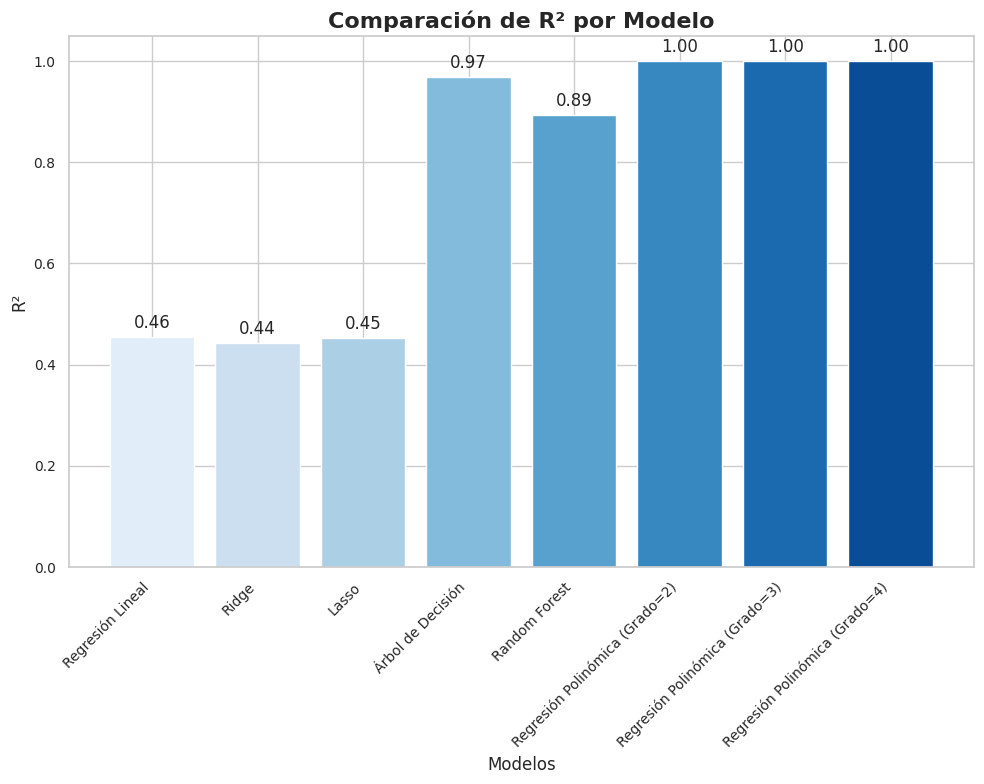

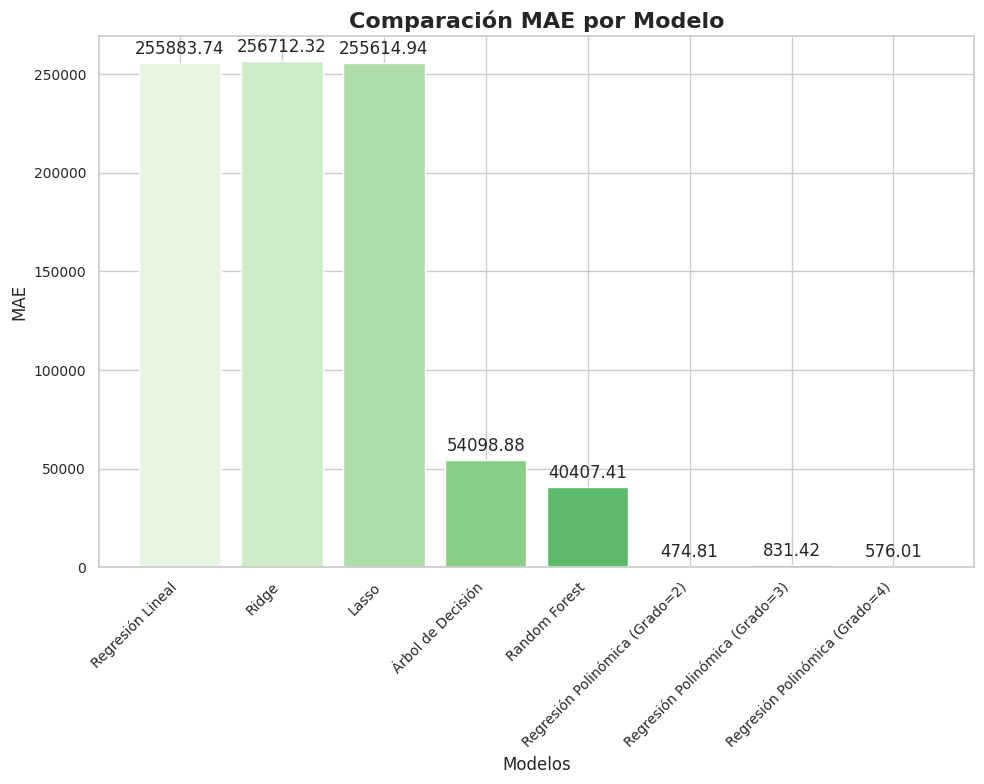

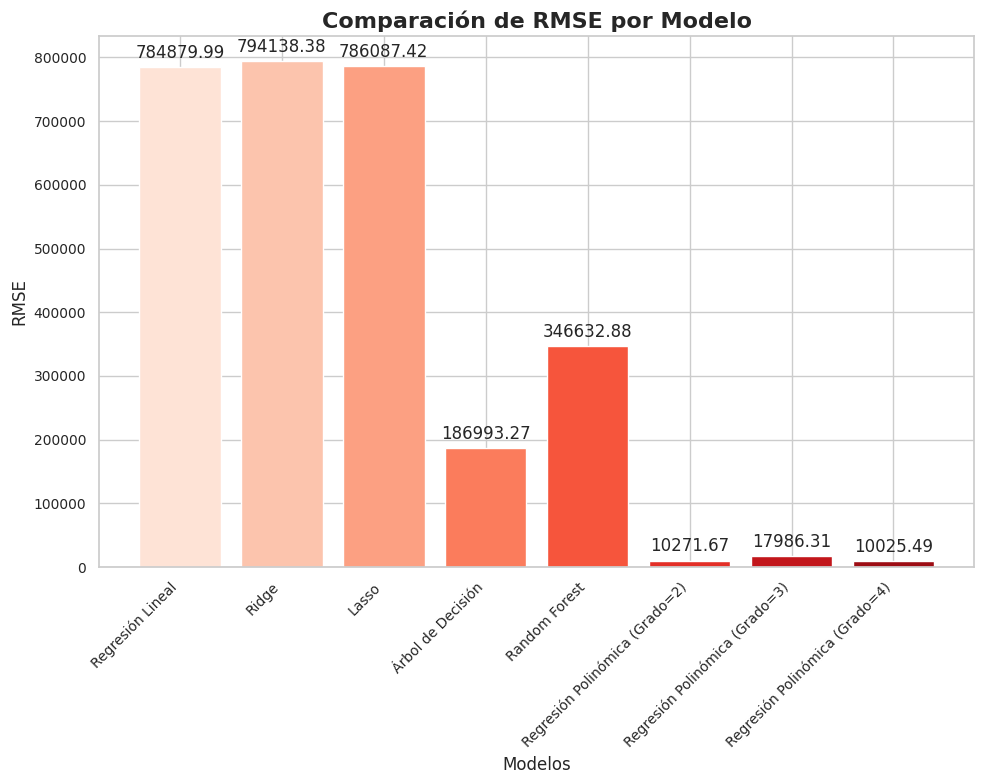

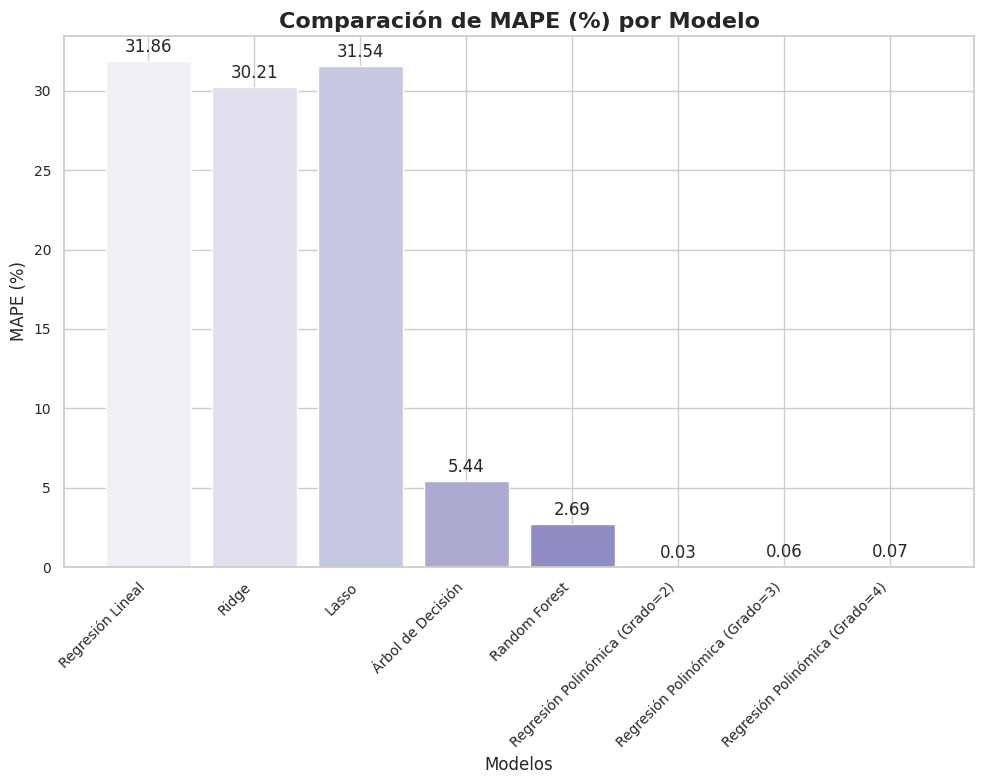

In [61]:
# Establecer estilo de Seaborn
sns.set(style="whitegrid", palette="muted")

# R²
plt.figure(figsize=(10, 8))  # Hacer la figura más alta
bars1 = plt.bar(df_resultados_finales['Modelo'], df_resultados_finales['R²'], color=sns.color_palette("Blues", len(df_resultados_finales)))
plt.title('Comparación de R² por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir valores encima de las barras
for i, v in enumerate(df_resultados_finales['R²']):
    plt.text(i, v + max(df_resultados_finales['R²'])*0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# MAE
plt.figure(figsize=(10, 8))  # Hacer la figura más alta
bars2 = plt.bar(df_resultados_finales['Modelo'], df_resultados_finales['MAE'], color=sns.color_palette("Greens", len(df_resultados_finales)))
plt.title('Comparación MAE por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir valores encima de las barras
for i, v in enumerate(df_resultados_finales['MAE']):
    plt.text(i, v + max(df_resultados_finales['MAE'])*0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# RMSE
plt.figure(figsize=(10, 8))  # Hacer la figura más alta
bars3 = plt.bar(df_resultados_finales['Modelo'], df_resultados_finales['RMSE'], color=sns.color_palette("Reds", len(df_resultados_finales)))
plt.title('Comparación de RMSE por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir valores encima de las barras
for i, v in enumerate(df_resultados_finales['RMSE']):
    plt.text(i, v + max(df_resultados_finales['RMSE'])*0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# MAPE
plt.figure(figsize=(10, 8))  # Hacer la figura más alta
bars4 = plt.bar(df_resultados_finales['Modelo'], df_resultados_finales['MAPE (%)'], color=sns.color_palette("Purples", len(df_resultados_finales)))
plt.title('Comparación de MAPE (%) por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('MAPE (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir valores encima de las barras
for i, v in enumerate(df_resultados_finales['MAPE (%)']):
    plt.text(i, v + max(df_resultados_finales['MAPE (%)'])*0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
